<a href="https://colab.research.google.com/github/CHENNURUHARISH/23024881-CLUSTERING-FITTING/blob/main/PLANT_DISEASEEXPERMENT_(2)_ACHEIEVE_BEST_AS_OF_NOW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Mar 29 10:12:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


















# Data Preprocessing
# Train image Processing

In [ ]:

### Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling, RandomBrightness, RandomContrast, RandomHue, RandomSaturation

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomlya
    RandomZoom(0.2),
    # RandomBrightness(0.2),      # Randomly adjust brightness by 20%
    # RandomContrast(0.2),        # Randomly adjust contrast by 20%
    # RandomHue(0.1),             # Randomly adjust hue by 10% (for color variation)
    # RandomSaturation(0.2),

])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# # Apply Data Augmentation & Normalization
# train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
# valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
from pickle import FALSE

# Load training dataset from directory (variable name: train_ds)
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",  # Direct path to training images
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


# Load validation dataset from directory (variable name: valid_ds)
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",  # Direct path to validation images
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128,128),
    shuffle=FALSE,  # No shuffling for validation set
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


# Print class names for both training and validation sets
print("Training Set Classes:", train_dataset.class_names)
#print("Validation Set Classes:", valid_ds.class_names)

# Apply data augmentation & normalization
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))



Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

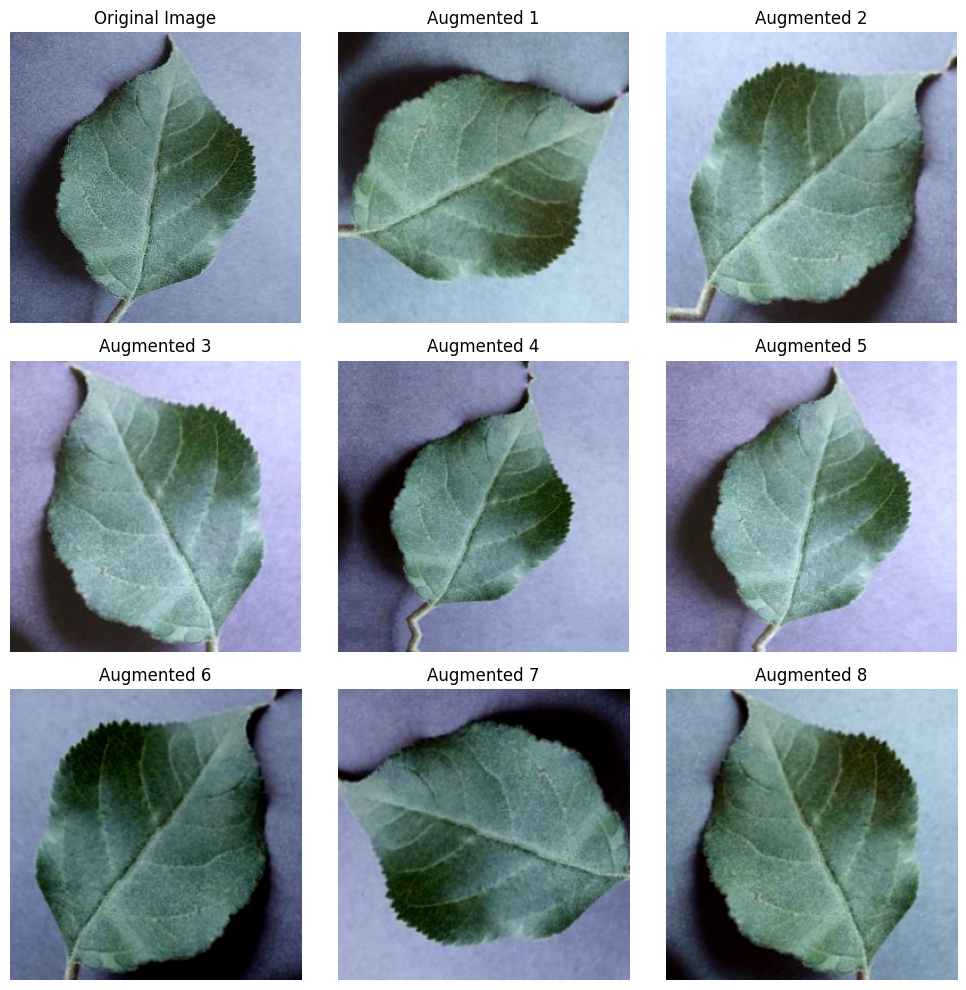

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling, RandomBrightness, RandomContrast, RandomHue, RandomSaturation
import numpy as np

# Load sample image
img_path = "/content/drive/MyDrive/train/Apple___healthy/6a2b2664-0e91-455c-8978-64c097631604___RS_HL 7808.JPG"
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)  # Convert to numpy array
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomBrightness(0.2),      # Randomly adjust brightness by 20%
    RandomContrast(0.2),        # Randomly adjust contrast by 20%
    RandomHue(0.1),             # Randomly adjust hue by 10% (for color variation)
    # RandomSaturation(0.2),
])

# Define normalization layer (rescale pixel values to [0,1])
normalization_layer = Rescaling(1./255)

# Plot original and augmented images
plt.figure(figsize=(10, 10))

# Show original image
original_img_np = image.img_to_array(img).astype("uint8")
plt.subplot(3, 3, 1)
plt.imshow(original_img_np)
plt.title("Original Image")
plt.axis("off")

# Generate and display 8 augmented images
for i in range(2, 10):
    augmented_img = data_augmentation(img_array, training=True)
    augmented_img = tf.squeeze(augmented_img)  # Remove batch dimension
    augmented_img = normalization_layer(augmented_img)  # Normalize
    plt.subplot(3, 3, i)
    plt.imshow(augmented_img.numpy())
    plt.title(f"Augmented {i-1}")
    plt.axis("off")

plt.tight_layout()
plt.show()


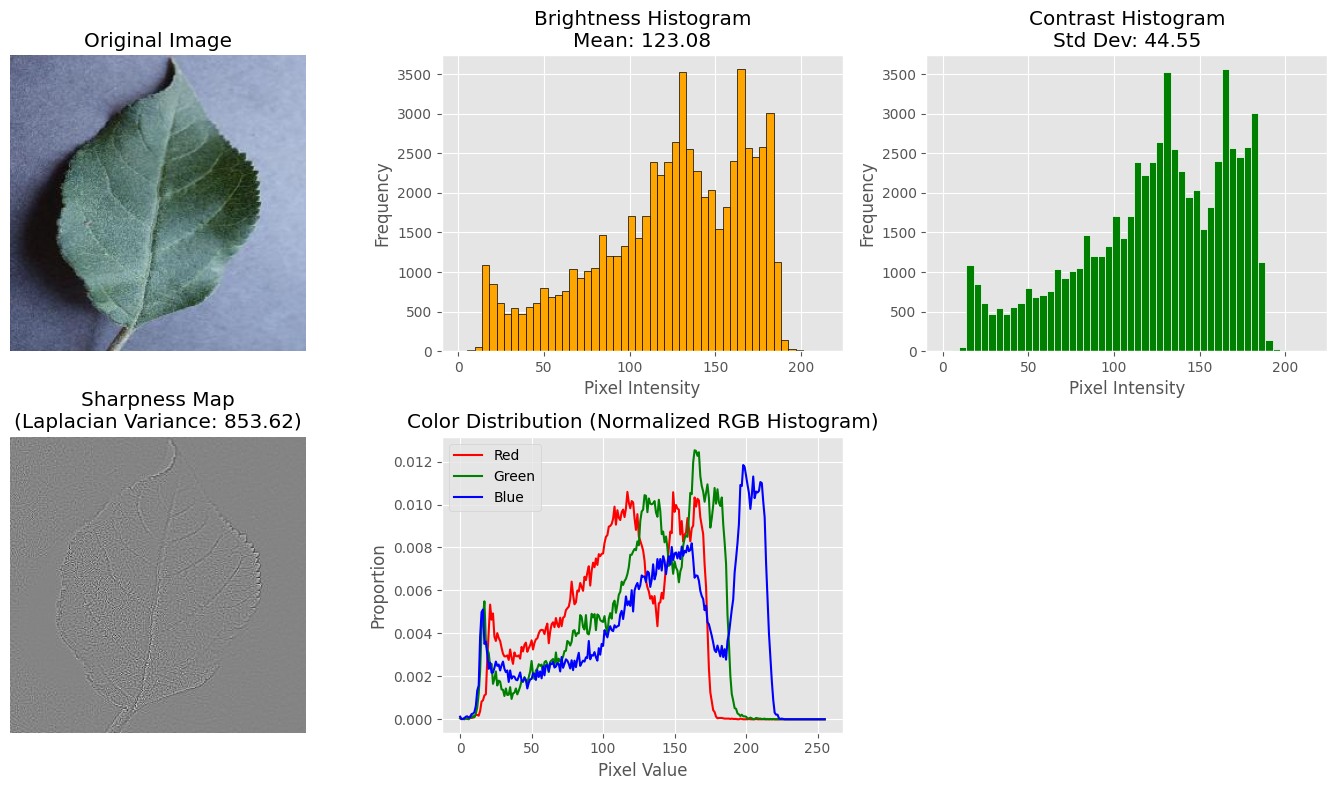

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Rescaling
import numpy as np
import cv2

# Set a clean Matplotlib style
plt.style.use('ggplot')  # Clean built-in style, avoids seaborn error

# Load sample image
img_path = "/content/drive/MyDrive/train/Apple___healthy/6a2b2664-0e91-455c-8978-64c097631604___RS_HL 7808.JPG"
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img).astype("uint8")

# Convert to grayscale for brightness, contrast, and sharpness
gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)

# Compute metrics
brightness = np.mean(gray)
contrast = np.std(gray)
sharpness = cv2.Laplacian(gray, cv2.CV_64F).var()

# Color distribution histograms
r_hist = cv2.calcHist([img_array], [0], None, [256], [0, 256])
g_hist = cv2.calcHist([img_array], [1], None, [256], [0, 256])
b_hist = cv2.calcHist([img_array], [2], None, [256], [0, 256])

# Normalize histograms for better comparison
r_hist /= r_hist.sum()
g_hist /= g_hist.sum()
b_hist /= b_hist.sum()

# -------------------------
# Plotting
plt.figure(figsize=(14, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(img_array)
plt.title("Original Image")
plt.axis("off")

# Brightness Histogram
plt.subplot(2, 3, 2)
plt.hist(gray.ravel(), bins=50, color='orange', edgecolor='black')
plt.title(f"Brightness Histogram\nMean: {brightness:.2f}")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Contrast Histogram (same grayscale for visual aid)
plt.subplot(2, 3, 3)
plt.hist(gray.ravel(), bins=50, color='green', edgecolor='white')
plt.title(f"Contrast Histogram\nStd Dev: {contrast:.2f}")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Sharpness Map (Laplacian)
plt.subplot(2, 3, 4)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
plt.imshow(laplacian, cmap='gray')
plt.title(f"Sharpness Map\n(Laplacian Variance: {sharpness:.2f})")
plt.axis("off")

# Color Distribution (RGB)
plt.subplot(2, 3, 5)
plt.plot(r_hist, color='red', label='Red')
plt.plot(g_hist, color='green', label='Green')
plt.plot(b_hist, color='blue', label='Blue')
plt.title("Color Distribution (Normalized RGB Histogram)")
plt.xlabel("Pixel Value")
plt.ylabel("Proportion")
plt.legend()

# Leave last subplot blank or use it for future comparison
plt.subplot(2, 3, 6)
plt.axis("off")

plt.tight_layout()
plt.show()


Processing images in /content/drive/MyDrive/train: 0it [00:00, ?it/s]
Processing images in /content/drive/MyDrive/train/Tomato___Leaf_Mold: 100%|██████████| 110/110 [00:00<00:00, 230.32it/s]
Processing images in /content/drive/MyDrive/train/Tomato___Target_Spot: 100%|██████████| 102/102 [00:00<00:00, 257.71it/s]
Processing images in /content/drive/MyDrive/train/Tomato___Spider_mites Two-spotted_spider_mite: 100%|██████████| 100/100 [00:00<00:00, 229.05it/s]
Processing images in /content/drive/MyDrive/train/Tomato___Early_blight: 100%|██████████| 101/101 [00:00<00:00, 256.67it/s]
Processing images in /content/drive/MyDrive/train/Tomato___Septoria_leaf_spot: 100%|██████████| 117/117 [00:00<00:00, 235.72it/s]
Processing images in /content/drive/MyDrive/train/Tomato___Tomato_mosaic_virus: 100%|██████████| 112/112 [00:00<00:00, 250.62it/s]
Processing images in /content/drive/MyDrive/train/Tomato___healthy: 100%|██████████| 111/111 [00:00<00:00, 217.26it/s]
Processing images in /content/driv


--- Visual Metrics Summary ---
Total images analyzed: 3815

Brightness - Mean: 122.41, Median: 121.67, Std Dev: 18.26
Contrast   - Mean: 40.61, Median: 40.71, Std Dev: 10.76
Sharpness  - Mean: 4142.56, Median: 3656.68, Std Dev: 3470.33


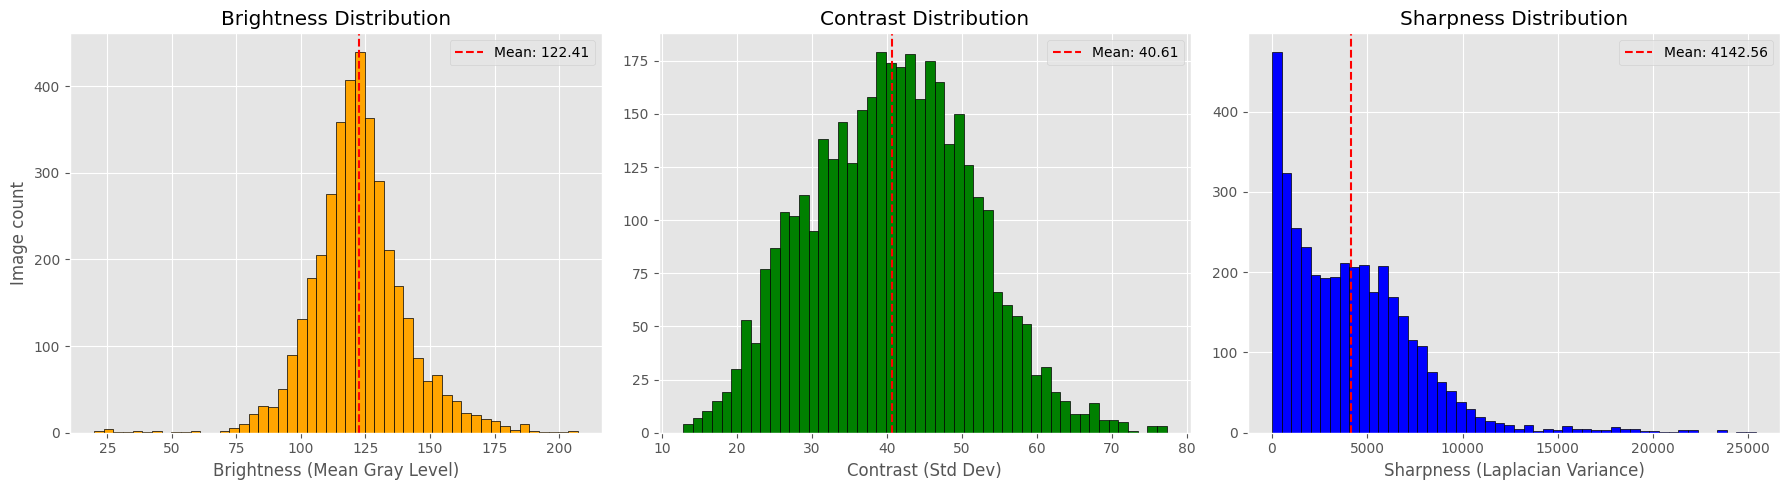

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
import matplotlib.pyplot as plt

# Set dataset path
dataset_dir = "/content/drive/MyDrive/train"

# Initialize metric lists
brightness_values = []
contrast_values = []
sharpness_values = []

# Loop through dataset folders and images
for root, dirs, files in os.walk(dataset_dir):
    for file in tqdm(files, desc=f"Processing images in {root}"):
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(root, file)
            try:
                img = image.load_img(img_path, target_size=(256, 256))
                img_array = image.img_to_array(img).astype("uint8")
                gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)

                # Brightness = mean of grayscale
                brightness = np.mean(gray)
                brightness_values.append(brightness)

                # Contrast = std dev of grayscale
                contrast = np.std(gray)
                contrast_values.append(contrast)

                # Sharpness = Laplacian variance
                sharpness = cv2.Laplacian(gray, cv2.CV_64F).var()
                sharpness_values.append(sharpness)

            except Exception as e:
                print(f"Error processing {img_path}: {e}")

# Convert to numpy arrays
brightness_values = np.array(brightness_values)
contrast_values = np.array(contrast_values)
sharpness_values = np.array(sharpness_values)

# Summary statistics
print("\n--- Visual Metrics Summary ---")
print(f"Total images analyzed: {len(brightness_values)}")

print(f"\nBrightness - Mean: {np.mean(brightness_values):.2f}, Median: {np.median(brightness_values):.2f}, Std Dev: {np.std(brightness_values):.2f}")
print(f"Contrast   - Mean: {np.mean(contrast_values):.2f}, Median: {np.median(contrast_values):.2f}, Std Dev: {np.std(contrast_values):.2f}")
print(f"Sharpness  - Mean: {np.mean(sharpness_values):.2f}, Median: {np.median(sharpness_values):.2f}, Std Dev: {np.std(sharpness_values):.2f}")

# -------------------------
# Plotting histograms
# -------------------------
plt.figure(figsize=(18, 5))

# Brightness Histogram
plt.subplot(1, 3, 1)
plt.hist(brightness_values, bins=50, color='orange', edgecolor='black')
plt.axvline(np.mean(brightness_values), color='red', linestyle='--', label=f"Mean: {np.mean(brightness_values):.2f}")
plt.title("Brightness Distribution")
plt.xlabel("Brightness (Mean Gray Level)")
plt.ylabel("Image count")
plt.legend()
plt.grid(True)

# Contrast Histogram
plt.subplot(1, 3, 2)
plt.hist(contrast_values, bins=50, color='green', edgecolor='black')
plt.axvline(np.mean(contrast_values), color='red', linestyle='--', label=f"Mean: {np.mean(contrast_values):.2f}")
plt.title("Contrast Distribution")
plt.xlabel("Contrast (Std Dev)")
plt.legend()
plt.grid(True)

# Sharpness Histogram
plt.subplot(1, 3, 3)
plt.hist(sharpness_values, bins=50, color='blue', edgecolor='black')
plt.axvline(np.mean(sharpness_values), color='red', linestyle='--', label=f"Mean: {np.mean(sharpness_values):.2f}")
plt.title("Sharpness Distribution")
plt.xlabel("Sharpness (Laplacian Variance)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:

train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 37), dtype=tf.float32, name=None))>

In [ ]:


for x,y in train_dataset:
  print(x, x.shape)
  print(y, y.shape)
  break

tf.Tensor(
[[[[49.72724   49.731754  49.72764  ]
   [49.701397  49.705994  49.7015   ]
   [49.678967  49.682755  49.67852  ]
   ...
   [49.74811   49.746483  49.748108 ]
   [49.736916  49.735424  49.736534 ]
   [49.72801   49.72638   49.72735  ]]

  [[49.698586  49.702503  49.69859  ]
   [49.660904  49.66405   49.660122 ]
   [49.62652   49.62854   49.625084 ]
   ...
   [49.748672  49.747     49.748627 ]
   [49.737877  49.736332  49.7375   ]
   [49.729927  49.72824   49.729202 ]]

  [[49.618874  49.62093   49.617996 ]
   [49.583206  49.584263  49.58169  ]
   [49.563934  49.56416   49.562027 ]
   ...
   [49.75036   49.748707  49.75028  ]
   [49.739365  49.737904  49.73907  ]
   [49.731583  49.72998   49.730907 ]]

  ...

  [[50.11368   50.113056  50.11634  ]
   [50.106567  50.105915  50.10934  ]
   [50.106133  50.10546   50.108974 ]
   ...
   [49.980938  49.98545   49.98057  ]
   [49.970333  49.974953  49.96998  ]
   [49.980186  49.98504   49.979977 ]]

  [[50.120216  50.119602  50.12283

In [ ]:

cnn = tf.keras.models.Sequential()

# MODEL

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [ ]:



cnn= Sequential()

In [ ]:


cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:




cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [ ]:


cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [ ]:




cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [ ]:


cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))




In [ ]:

cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:

cnn.add(tf.keras.layers.Flatten())


In [ ]:

cnn.add(tf.keras.layers.Dense(units=1400,activation='relu'))


In [ ]:



cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [ ]:


#Output Layer
cnn.add(tf.keras.layers.Dense(units=37,activation='softmax'))


## **Compiling and Training Phase**


In [ ]:



cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:



cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1400)                │       2,868,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 37)                  │          51,837 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,632,661 (29.12 MB)

 Trainable params: 7,632,661 (29.12 MB)

 Non-trainable params: 0 (0.00 B)

**MODEL** **TRAINING**

In [ ]:


training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=40)

Epoch 1/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 604s 5s/step - accuracy: 0.0259 - loss: 3.6206 - val_accuracy: 0.0082 - val_loss: 3.6135
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 32s 268ms/step - accuracy: 0.0259 - loss: 3.6060 - val_accuracy: 0.0082 - val_loss: 3.6169
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 33s 270ms/step - accuracy: 0.0312 - loss: 3.6039 - val_accuracy: 0.0082 - val_loss: 3.6211
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 33s 272ms/step - accuracy: 0.0290 - loss: 3.6034 - val_accuracy: 0.0082 - val_loss: 3.6202
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 34s 282ms/step - accuracy: 0.0306 - loss: 3.6034 - val_accuracy: 0.0082 - val_loss: 3.6202
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 33s 276ms/step - accuracy: 0.0270 - loss: 3.5999 - val_accuracy: 0.0082 - val_loss: 3.6226
Epoch 7/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 34s 282ms/step - accuracy: 0.0255 - loss: 3.6011 - val_accuracy: 0.0082 - val_loss: 3.6213
Epoch 8/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 33s 271ms/step - accuracy: 0.0297 - loss: 3.6

KeyboardInterrupt: 

In [ ]:



 #Training set Accuracy
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)


120/120 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.8418 - loss: 0.4618
Training accuracy: 0.8382700085639954


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)

118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.7516 - loss: 0.9623
Validation accuracy: 0.7742705345153809


## **SAVING MODEL**

In [ ]:
cnn.save('trained_plant_disease_model.keras')
training_history.history #Return Dictionary of history

{'accuracy': [0.027522936463356018,
  0.04980340600013733,
  0.08597640693187714,
  0.12712974846363068,
  0.21048492193222046,
  0.260026216506958,
  0.31716907024383545,
  0.3740498125553131,
  0.4104849398136139,
  0.437221497297287,
  0.5030144453048706,
  0.5237221717834473,
  0.5619921088218689,
  0.5811271071434021,
  0.6123197674751282,
  0.6319790482521057,
  0.6681520342826843,
  0.677850604057312,
  0.6972476840019226,
  0.7069462537765503,
  0.7226736545562744,
  0.7323722243309021,
  0.7543905377388,
  0.7465268969535828,
  0.7701179385185242,
  0.7847968339920044,
  0.7837483882904053,
  0.795543909072876,
  0.8086500763893127,
  0.8251638412475586],
 'loss': [3.605560302734375,
  3.4483606815338135,
  3.2612593173980713,
  3.0365352630615234,
  2.6168370246887207,
  2.33310866355896,
  2.1621761322021484,
  2.016392230987549,
  1.8668382167816162,
  1.762191891670227,
  1.5710036754608154,
  1.4923087358474731,
  1.3437548875808716,
  1.317514181137085,
  1.1829297542572

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


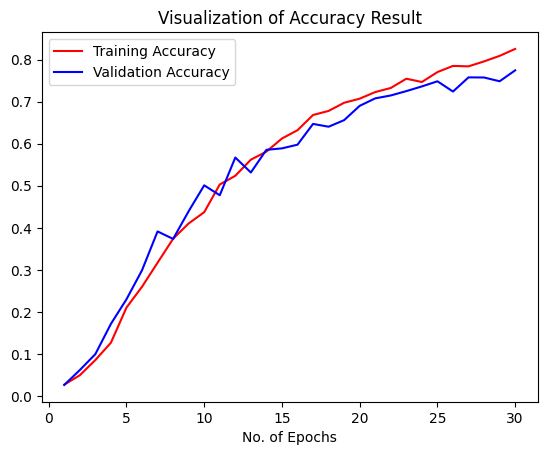

In [ ]:
# epochs = range(1, len(training_history.history['accuracy']) + 1)
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### OTHER METRICS FOR EVALUATION


In [ ]:

test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",  # Direct path to validation images
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Correct way to get class names
class_names = test_set.class_names
print(class_names)  # Check the class names


Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

3770/3770 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step


<tf.Tensor: shape=(3770,), dtype=int64, numpy=array([1, 1, 1, ..., 1, 1, 1])>

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(3770,), dtype=int64, numpy=array([ 0,  0,  0, ..., 36, 36, 36])>

In [ ]:

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       126
                                 Apple___Black_rot       0.05      0.99      0.09       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.00      0.00      0.00       109
                               Blueberry___healthy       0.00      0.00      0.00       100
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       100
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       109
               Corn_(maize)___Northern_Leaf_Blight       0.50      0.02      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CONFUSION MATRIX


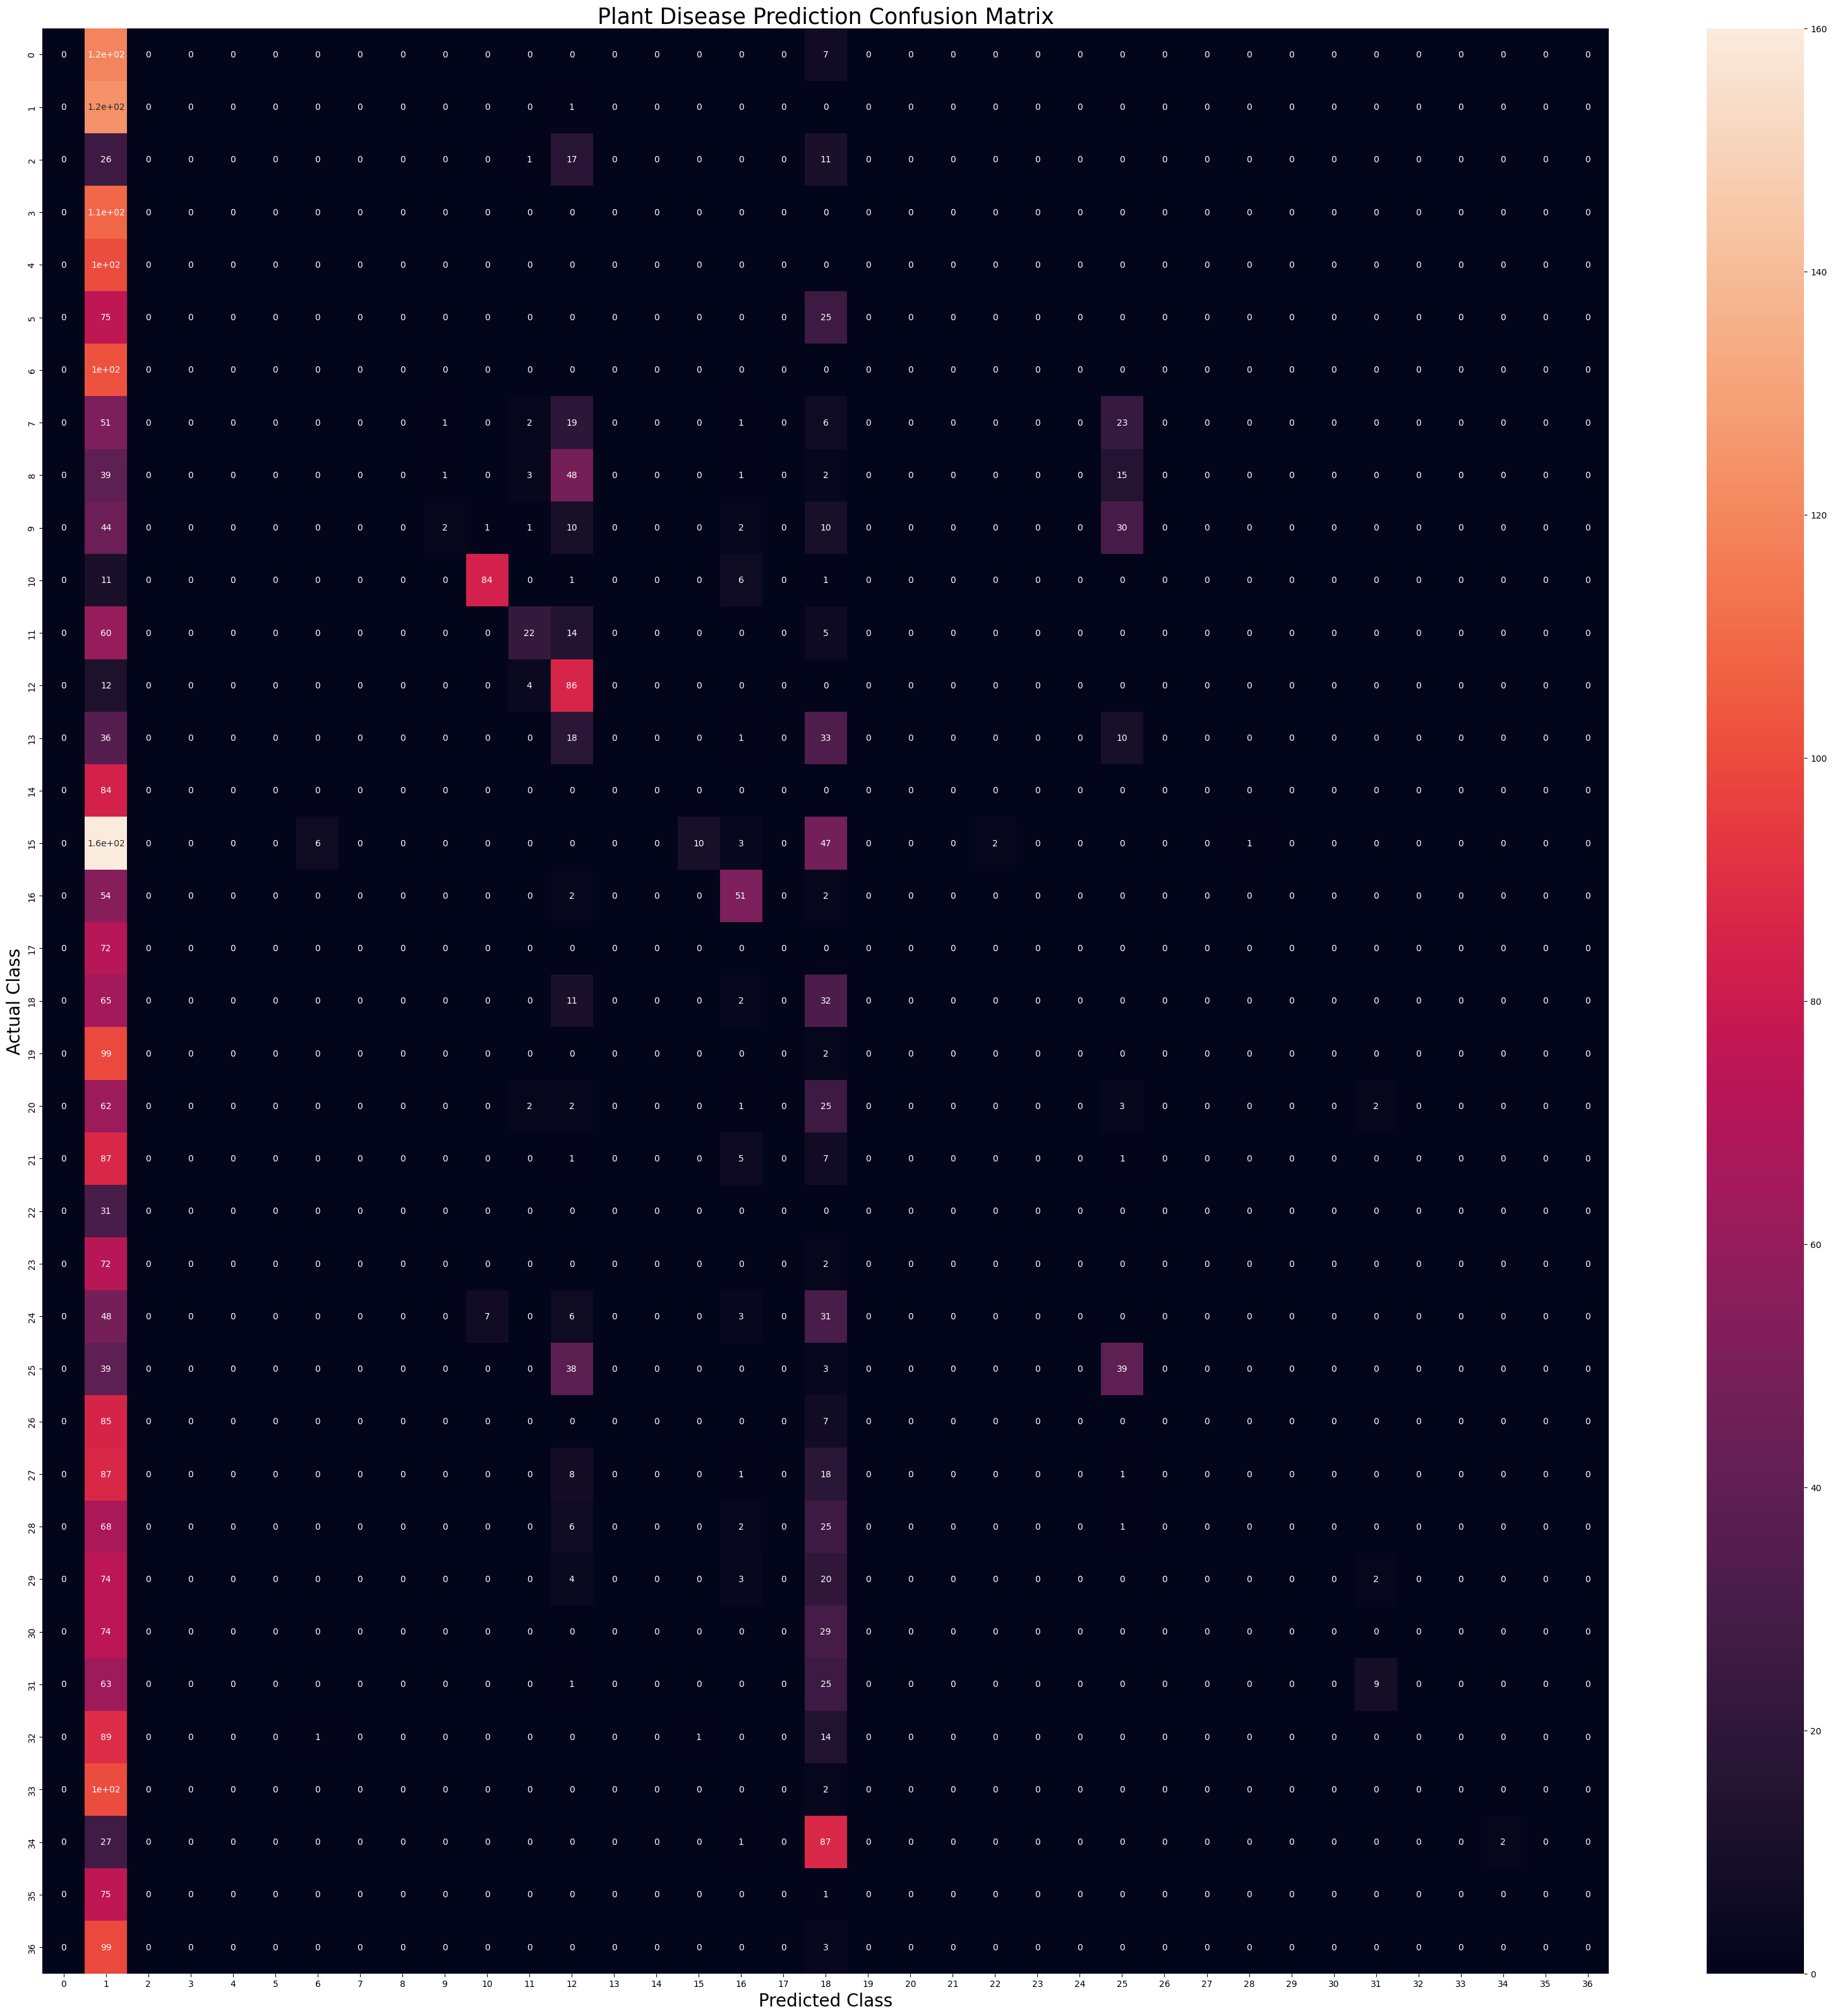

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Access class names correctly
class_names = validation_set.class_names
print(class_names)


Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

In [ ]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

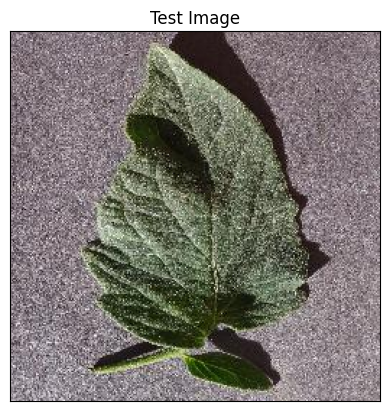

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Correcting the file path by enclosing it in quotes
image_path = "/content/drive/MyDrive/val/Tomato___healthy/01f98912-9627-4ce0-8f0f-e451b7acbb6c___RS_HL 0509.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])  # Hides the x-axis ticks
plt.yticks([])  # Hides the y-axis ticks
plt.show()


### **TEST MODEL**

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


In [ ]:
print(predictions)

[[0.0000000e+00 9.9994504e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 5.4952277e-05 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1


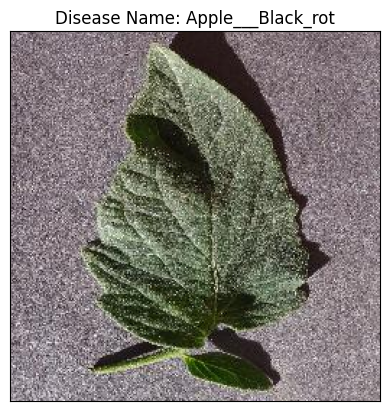

In [ ]:
# Displaying the disease prediction
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

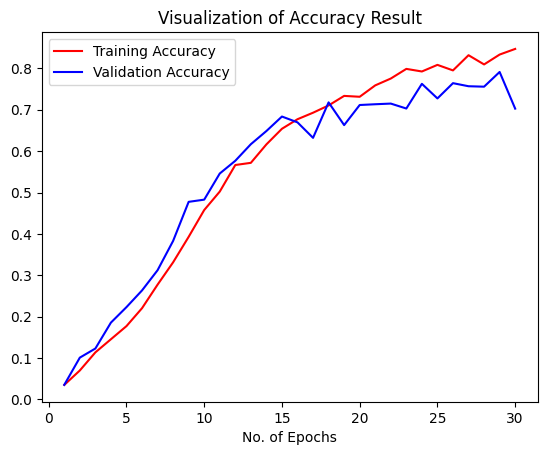

Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.39      0.10      0.16       126
                                 Apple___Black_rot       0.26      0.57      0.36       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.00      0.00      0.00       109
                               Blueberry___healthy       0.06      0.96      0.12       100
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       100
                 Cherry_(including_sour)___healthy       0.20      0.37      0.26       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.15      0.06      0.09       109
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

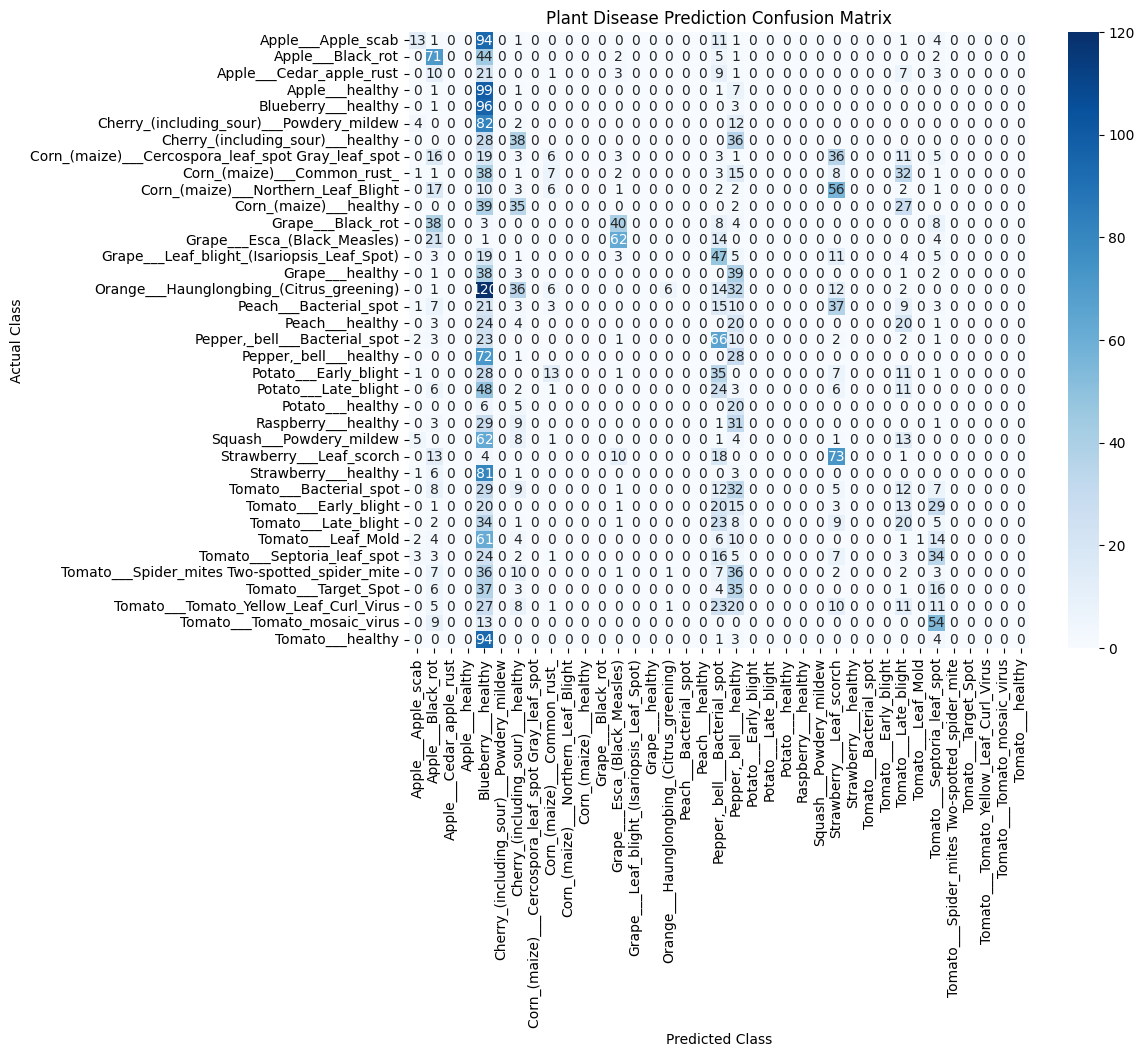

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Store class names before applying the map function
class_names = train_dataset.class_names

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# # Print class names for both training and validation sets
# print("Training Set Classes:", train_dataset.class_names)


# Now you can print the class names
print("Training Set Classes:", class_names)

# Define CNN model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=1500, activation='relu'))
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=30)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)

# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print(class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Evaluate model using a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Plant Disease Prediction Confusion Matrix')
plt.show()


Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 32s 210ms/step - accuracy: 0.0280 - loss: 3.6040 - val_accuracy: 0.0403 - val_loss: 3.6971
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 180ms/step - accuracy: 0.0598 - loss: 3.4474 - val_accuracy: 0.1178 - val_loss: 3.2447
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 182ms/step - accuracy: 0.0998 - loss: 3.2070 - val_accuracy: 0.1387 - val_loss: 3.0734
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 178ms/step - accuracy: 0.1475 - loss: 2.9912 - val_accuracy: 0.1801 - val_loss: 3.0400
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 183ms/step - accuracy: 0.2020 - loss: 2.7969 - val_accuracy: 0.2599 - val_loss: 2.5685
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 176ms/step - accuracy: 0.2492 - loss: 2.5409 - val_accuracy: 0.2215 - val_loss: 2.8607
Epoch 7/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 181ms/step - accuracy: 0.2718 - loss: 2.4726 - val_accuracy: 0.3318 - val_loss: 2.3686
Epoch 8/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 180ms/step - accuracy: 0.3256 - loss: 2.2637 - val

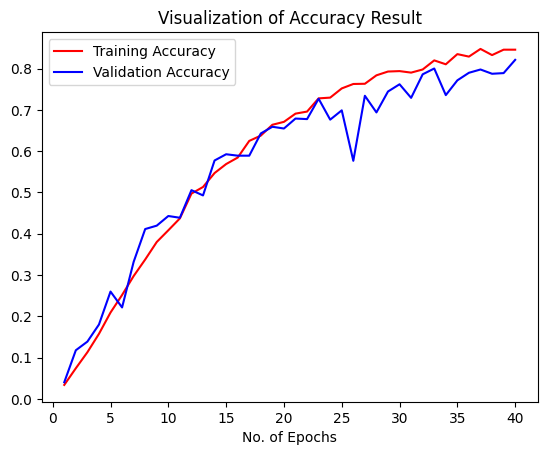

Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.69      0.35      0.46       126
                                 Apple___Black_rot       0.89      0.14      0.24       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.00      0.00      0.00       109
                               Blueberry___healthy       0.16      0.19      0.17       100
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       100
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       109
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

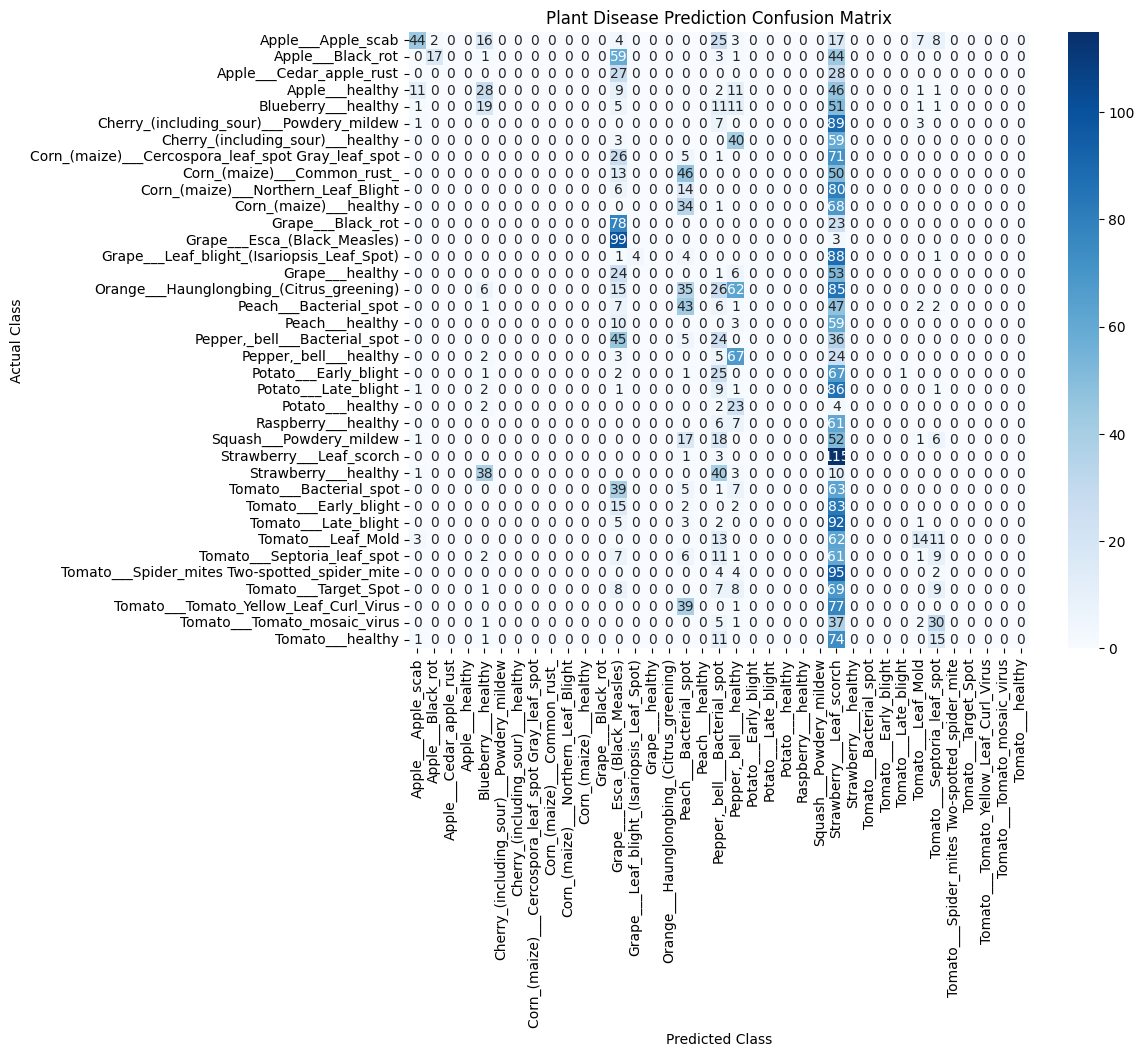

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
    # RandomBrightness(0.2),      # Randomly adjust brightness by 20%
    # RandomContrast(0.2),        # Randomly adjust contrast by 20%
    # RandomHue(0.1),             # Randomly adjust hue by 10% (for color variation)
    # RandomSaturation(0.2),      # Randomly adjust saturation by 20%

])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Store class names before applying the map function
class_names = train_dataset.class_names

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# # Print class names for both training and validation sets
# print("Training Set Classes:", train_dataset.class_names)


# Now you can print the class names
print("Training Set Classes:", class_names)

# Define CNN model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=1500, activation='relu'))
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=40)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)

# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['loss'], 'orange', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], 'green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print(class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Evaluate model using a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Plant Disease Prediction Confusion Matrix')
plt.show()


Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

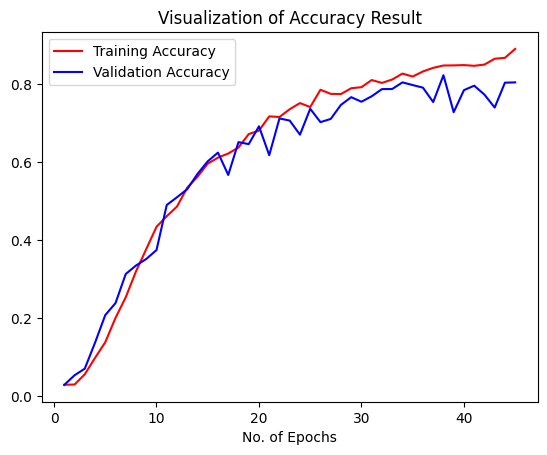

Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.56      0.11      0.19       126
                                 Apple___Black_rot       0.24      0.88      0.38       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.17      0.17      0.17       109
                               Blueberry___healthy       0.16      0.39      0.23       100
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       100
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       109
               Corn_(maize)___Northern_Leaf_Blight       0.47      0.09      0.

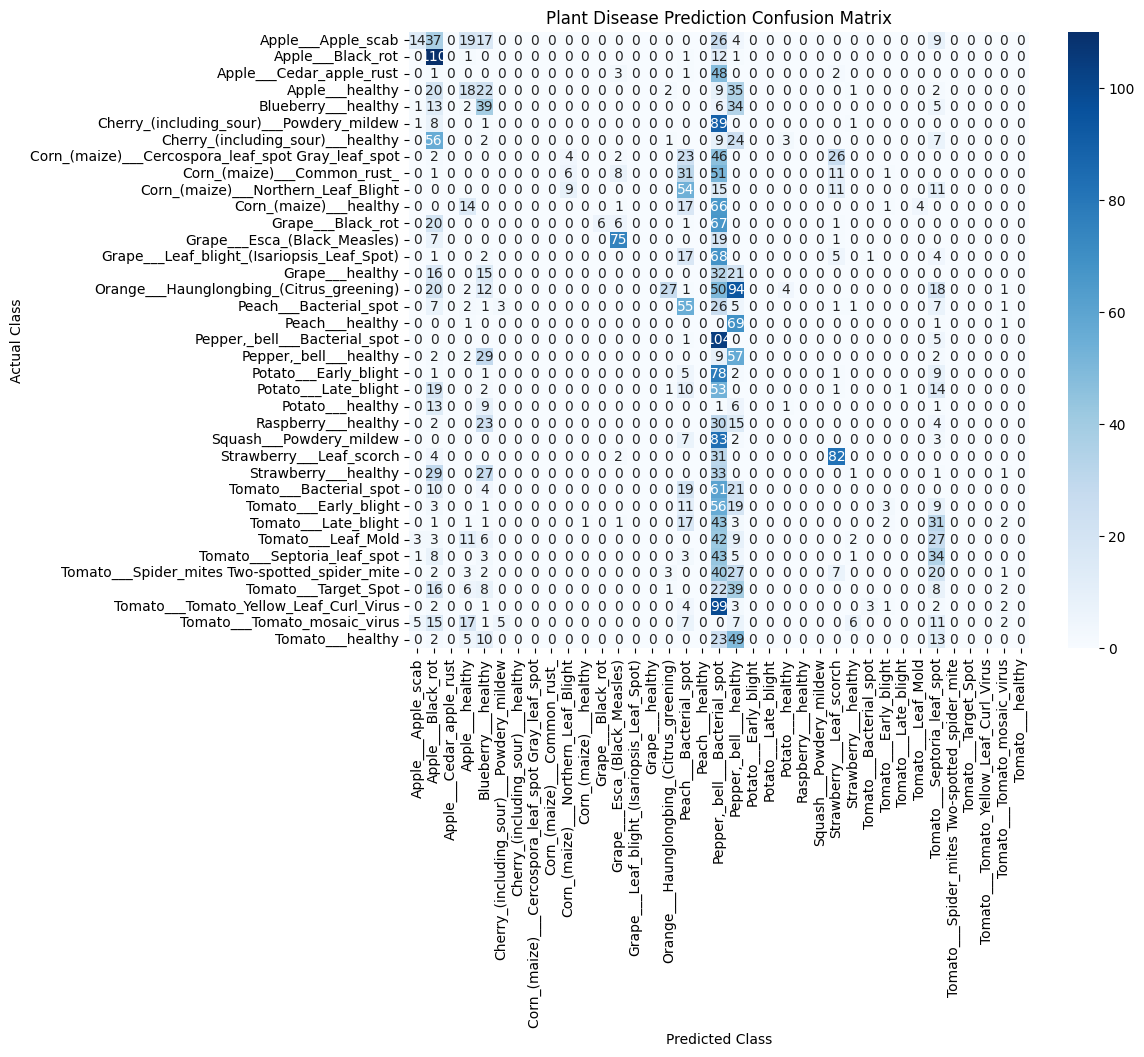

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Store class names before applying the map function
class_names = train_dataset.class_names

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# # Print class names for both training and validation sets
# print("Training Set Classes:", train_dataset.class_names)


# Now you can print the class names
print("Training Set Classes:", class_names)

# Define CNN model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=1500, activation='relu'))
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=45)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)

# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print(class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Evaluate model using a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Plant Disease Prediction Confusion Matrix')
plt.show()


final custom


Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

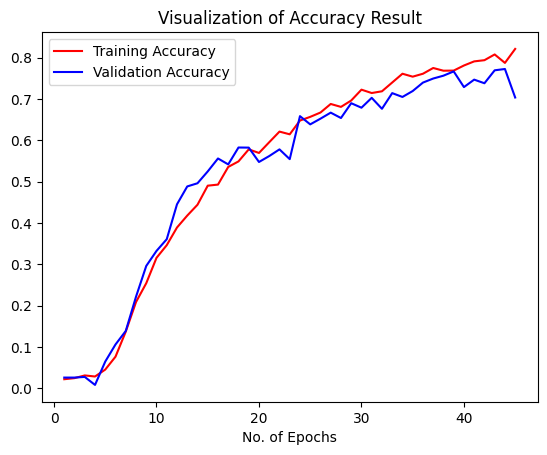

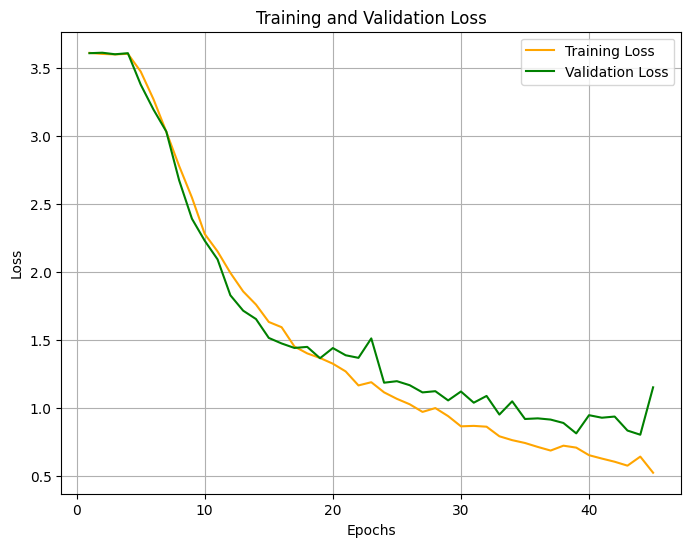

Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       126
                                 Apple___Black_rot       0.23      0.18      0.21       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.25      0.01      0.02       109
                               Blueberry___healthy       0.00      0.00      0.00       100
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       100
                 Cherry_(including_sour)___healthy       0.29      0.04      0.07       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       109
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

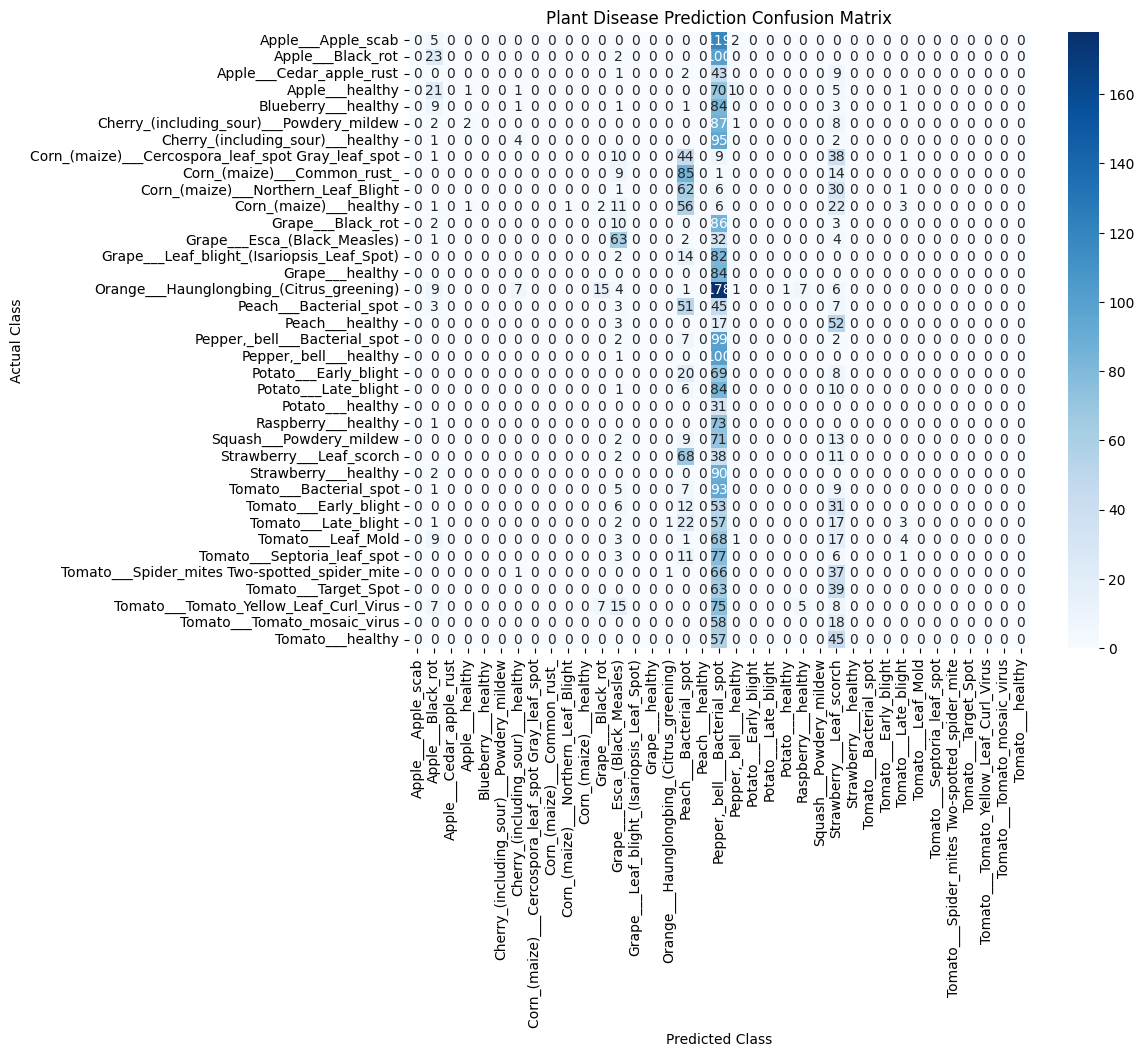

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly

])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Store class names before applying the map function
class_names = train_dataset.class_names

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# # Print class names for both training and validation sets
# print("Training Set Classes:", train_dataset.class_names)


# Now you can print the class names
print("Training Set Classes:", class_names)

# Define CNN model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=1500, activation='relu'))
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=45)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)


# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)



# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['loss'], 'orange', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], 'green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print(class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Evaluate model using a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Plant Disease Prediction Confusion Matrix')
plt.show()


Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 43s 258ms/step - accuracy: 0.0318 - loss: 3.6133 - val_accuracy: 0.0289 - val_loss: 3.6120
Epoch 2/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 181ms/step - accuracy: 0.0312 - loss: 3.6040 - val_accuracy: 0.0390 - val_loss: 3.6155
Epoch 3/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 181ms/step - accuracy: 0.0539 - loss: 3.4315 - val_accuracy: 0.0958 - val_loss: 3.3633
Epoch 4/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 23s 192ms/step - accuracy: 0.0964 - loss: 3.2317 - val_accuracy: 0.1401 - val_loss: 3.1668
Epoch 5/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 180ms/step - accuracy: 0.1415 - loss: 3.0373 - val_accuracy: 0.1889 - val_loss: 2.8864
Epoch 6/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 179ms/step - accuracy: 0.1874 - loss: 2.8425 - val_accuracy: 0.2058 - val_loss: 2.7814
Epoch 7/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 185ms/step - accuracy: 0.2276 - loss: 2.7031 - val_accuracy: 0.2865 - val_loss: 2.5423
Epoch 8/45
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 184ms/step - accuracy: 0.2673 - loss: 2

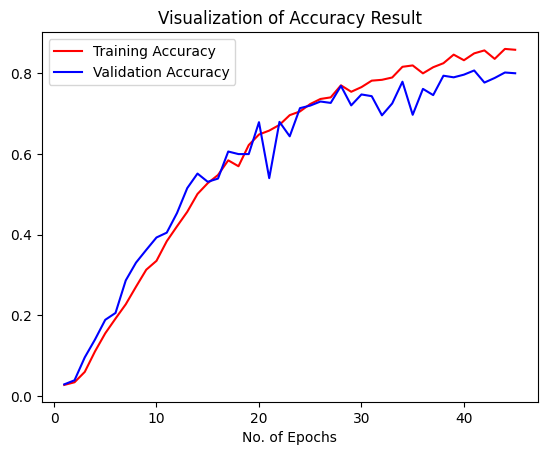

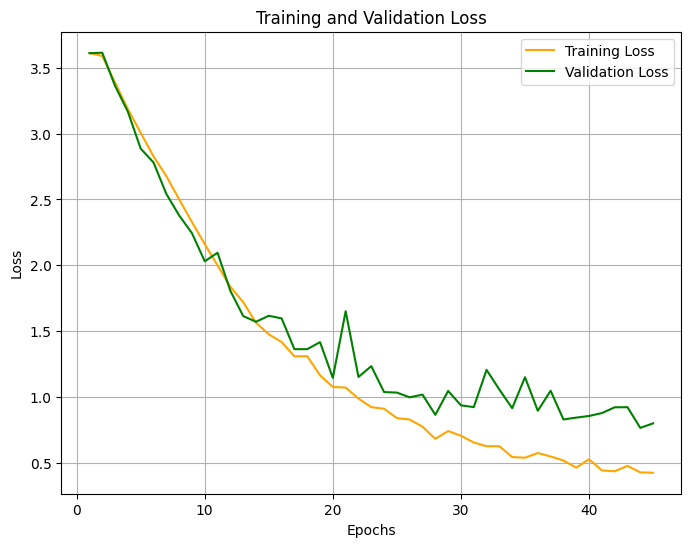

Found 3770 files belonging to 37 classes.
Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted

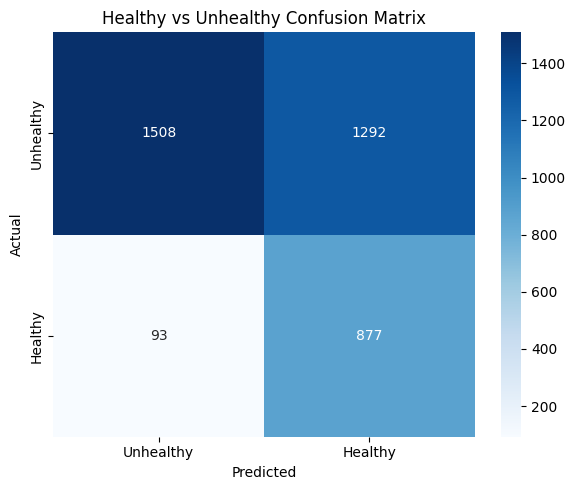

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Store class names before applying the map function
class_names = train_dataset.class_names

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# Now you can print the class names
print("Training Set Classes:", class_names)

# Define CNN model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=1400, activation='relu'))
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=45)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)
print('Training accuracy:', train_loss)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)
print('Validation accuracy:', val_loss)

# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['loss'], 'red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], 'blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",  # Update path if needed
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print("Class Names:", class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Define Healthy vs Unhealthy classes (You can modify the condition depending on your dataset)
# Example: Assume classes with the name "healthy" are healthy
healthy_classes = [cls for cls in class_names if 'healthy' in cls.lower()]  # Modify this according to your class names
healthy_class_indices = [class_names.index(cls) for cls in healthy_classes]

# Convert multi-class labels to binary (1 for healthy, 0 for unhealthy)
y_true_binary = [1 if label in healthy_class_indices else 0 for label in Y_true.numpy()]
y_pred_binary = [1 if label in healthy_class_indices else 0 for label in predicted_categories.numpy()]

# Print classification report for Healthy vs Unhealthy
print("\nHealthy vs Unhealthy Classification Report:")
print(classification_report(y_true_binary, y_pred_binary, target_names=["Unhealthy", "Healthy"]))

# Compute confusion matrix
cm = confusion_matrix(y_true_binary, y_pred_binary)

# Plot healthy/unhealthy confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unhealthy", "Healthy"], yticklabels=["Unhealthy", "Healthy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Healthy vs Unhealthy Confusion Matrix")
plt.tight_layout()
plt.show()


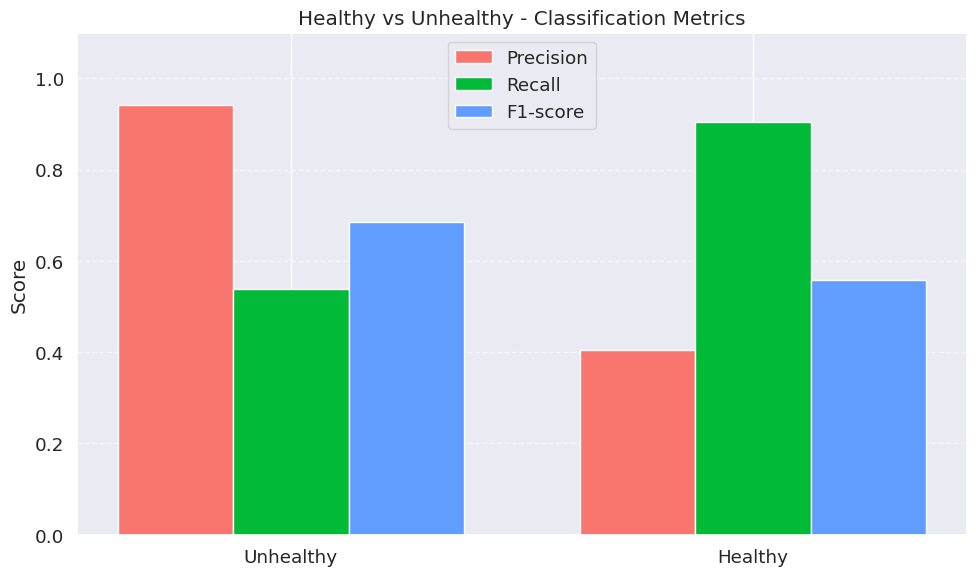

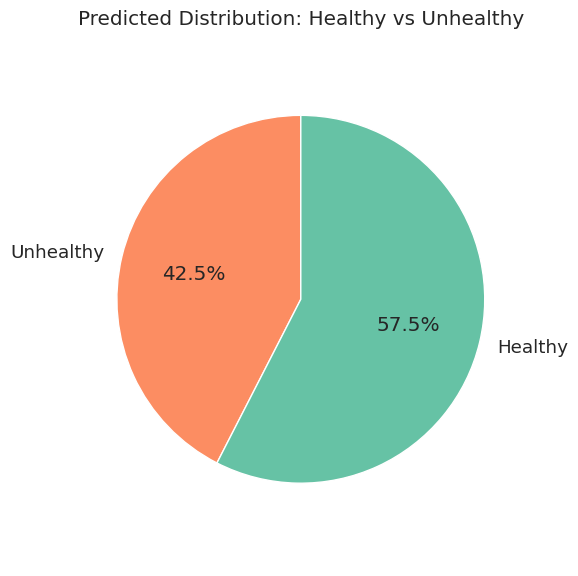

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Classification report for bar chart
report = classification_report(
    y_true_binary,
    y_pred_binary,
    target_names=["Unhealthy", "Healthy"],
    output_dict=True
)

# ---- BAR CHART: Precision, Recall, F1 ----
labels = ["Unhealthy", "Healthy"]
metrics_to_plot = ["precision", "recall", "f1-score"]
colors = ['#f8766d', '#00ba38', '#619cff']  # Soft red, green, blue

x = np.arange(len(labels))  # positions for 'Unhealthy', 'Healthy'
width = 0.25

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics_to_plot):
    values = [report[label][metric] for label in labels]
    plt.bar(x + i * width, values, width, label=metric.capitalize(), color=colors[i])

plt.xticks(x + width, labels)
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Healthy vs Unhealthy - Classification Metrics")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ---- PIE CHART: Healthy vs Unhealthy Predictions ----
pred_counts = [np.sum(np.array(y_pred_binary) == 0), np.sum(np.array(y_pred_binary) == 1)]

plt.figure(figsize=(6, 6))
plt.pie(
    pred_counts,
    labels=["Unhealthy", "Healthy"],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#fc8d62', '#66c2a5']
)
plt.title('Predicted Distribution: Healthy vs Unhealthy')
plt.axis('equal')
plt.tight_layout()
plt.show()


Healthy vs Unhealthy Classification Report:

              precision    recall  f1-score   support

   Unhealthy       0.89      0.76      0.82      2800
     Healthy       0.51      0.72      0.60       970

    accuracy                           0.75      3770
   macro avg       0.70      0.74      0.71      3770
weighted avg       0.79      0.75      0.76      3770



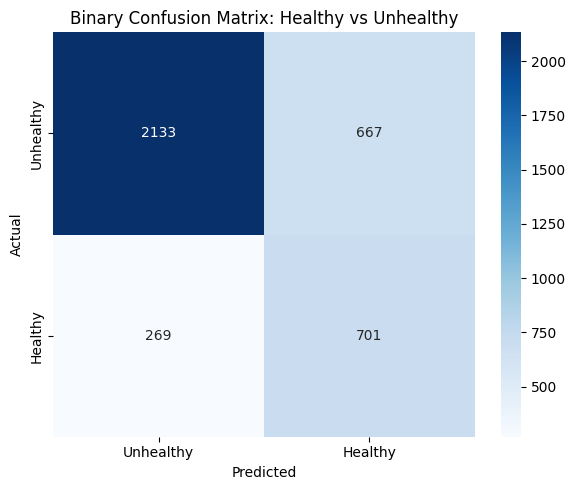

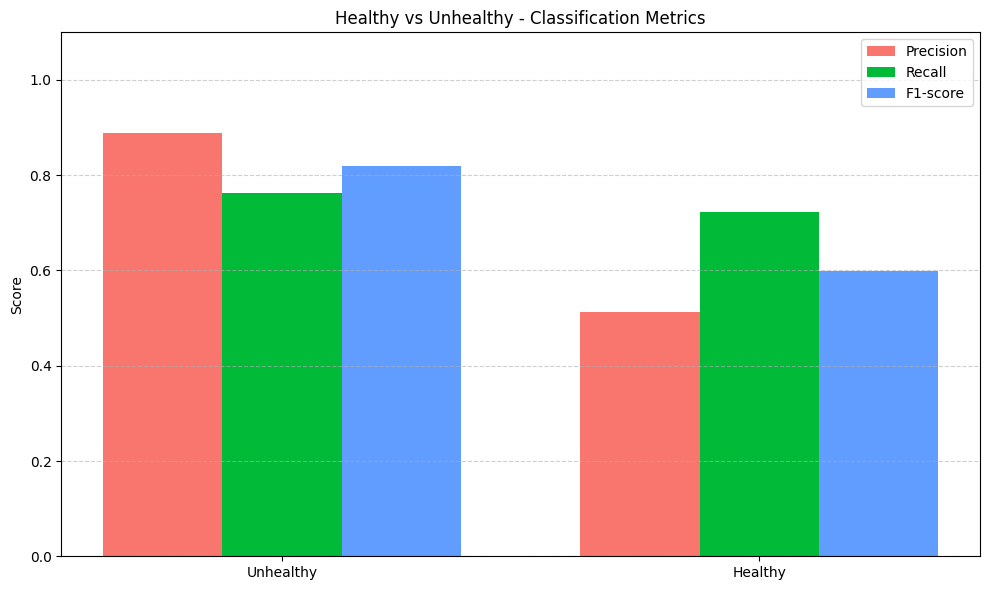

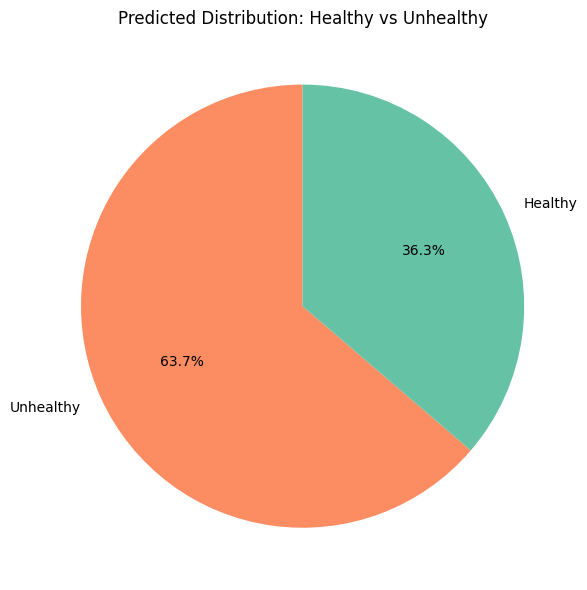

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- Define Healthy Classes (based on name) ---
healthy_classes = [cls for cls in class_names if 'healthy' in cls.lower()]
healthy_class_indices = [class_names.index(cls) for cls in healthy_classes]

# --- Convert to Binary Labels ---
y_true_binary = [1 if label in healthy_class_indices else 0 for label in Y_true.numpy()]
y_pred_binary = [1 if label in healthy_class_indices else 0 for label in predicted_categories.numpy()]

# --- Classification Report ---
print("Healthy vs Unhealthy Classification Report:\n")
print(classification_report(y_true_binary, y_pred_binary, target_names=["Unhealthy", "Healthy"]))

# --- Confusion Matrix ---
cm = confusion_matrix(y_true_binary, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Unhealthy", "Healthy"],
            yticklabels=["Unhealthy", "Healthy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Binary Confusion Matrix: Healthy vs Unhealthy")
plt.tight_layout()
plt.show()


import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Classification report for bar chart
report = classification_report(
    y_true_binary,
    y_pred_binary,
    target_names=["Unhealthy", "Healthy"],
    output_dict=True
)

# ---- BAR CHART: Precision, Recall, F1 ----
labels = ["Unhealthy", "Healthy"]
metrics_to_plot = ["precision", "recall", "f1-score"]
colors = ['#f8766d', '#00ba38', '#619cff']  # Soft red, green, blue

x = np.arange(len(labels))  # positions for 'Unhealthy', 'Healthy'
width = 0.25

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics_to_plot):
    values = [report[label][metric] for label in labels]
    plt.bar(x + i * width, values, width, label=metric.capitalize(), color=colors[i])

plt.xticks(x + width, labels)
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Healthy vs Unhealthy - Classification Metrics")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ---- PIE CHART: Healthy vs Unhealthy Predictions ----
pred_counts = [np.sum(np.array(y_pred_binary) == 0), np.sum(np.array(y_pred_binary) == 1)]

plt.figure(figsize=(6, 6))
plt.pie(
    pred_counts,
    labels=["Unhealthy", "Healthy"],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#fc8d62', '#66c2a5']
)
plt.title('Predicted Distribution: Healthy vs Unhealthy')
plt.axis('equal')
plt.tight_layout()
plt.show()



Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

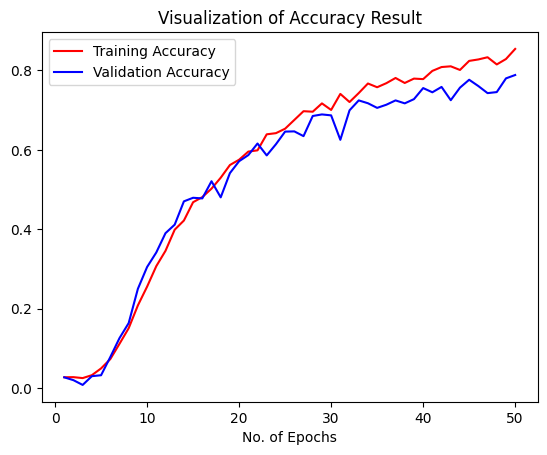

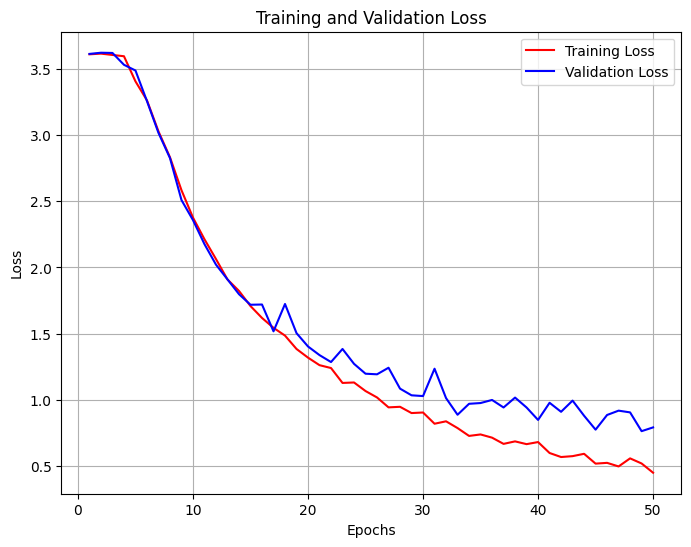

Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       126
                                 Apple___Black_rot       0.05      0.99      0.09       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.00      0.00      0.00       109
                               Blueberry___healthy       0.34      0.22      0.27       100
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       100
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.50      0.17      0.26       103
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       109
               Corn_(maize)___Northern_Leaf_Blight       0.33      0.64      0.

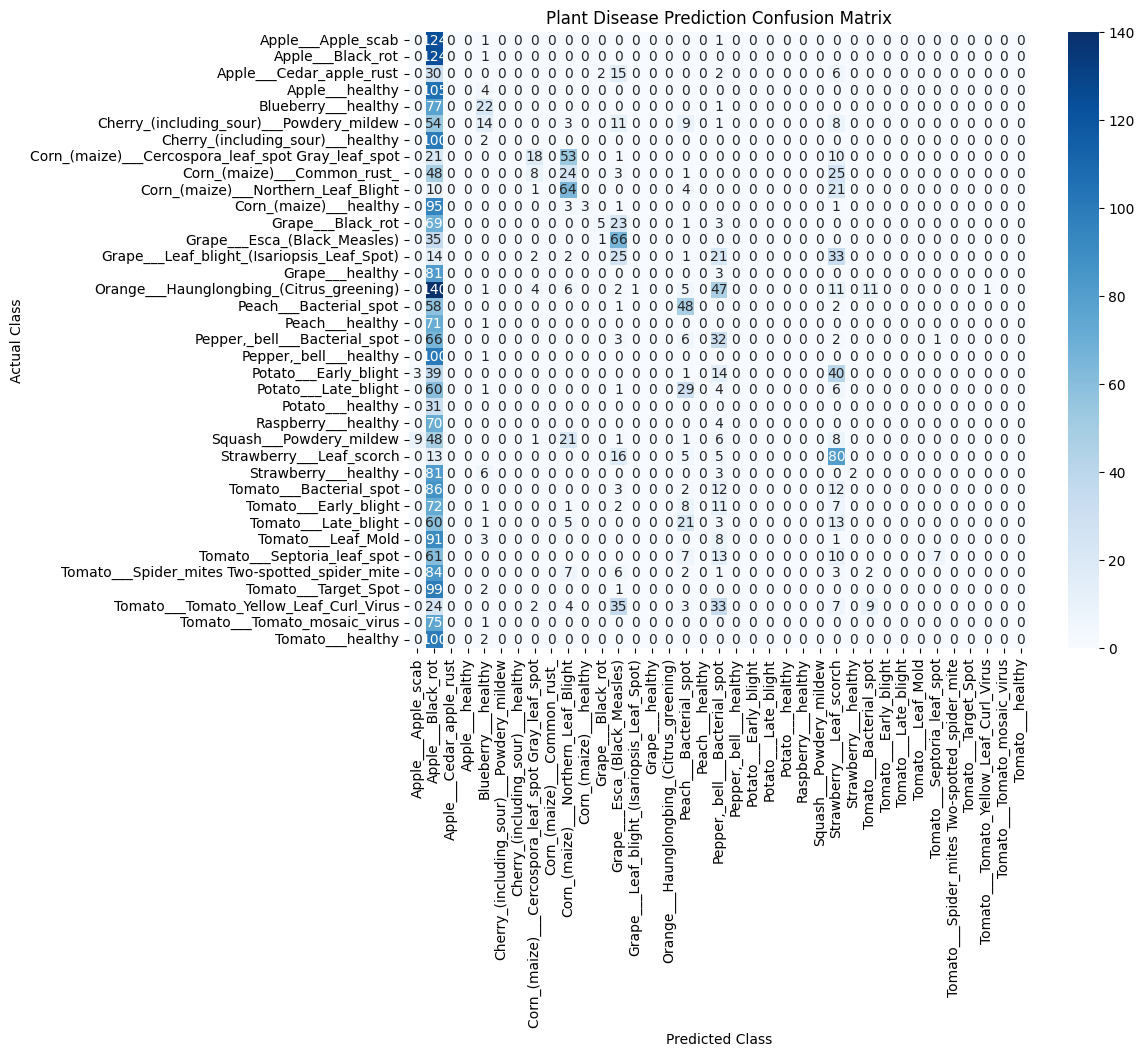

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
    # RandomBrightness(0.2),      # Randomly adjust brightness by 20%
    # RandomContrast(0.2),        # Randomly adjust contrast by 20%
    # RandomHue(0.1),             # Randomly adjust hue by 10% (for color variation)
    # RandomSaturation(0.2),      # Randomly adjust saturation by 20%

])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Store class names before applying the map function
class_names = train_dataset.class_names

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# # Print class names for both training and validation sets
# print("Training Set Classes:", train_dataset.class_names)


# Now you can print the class names
print("Training Set Classes:", class_names)

# Define CNN model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=1500, activation='relu'))
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=50)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)

# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['loss'], 'red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], 'blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print(class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# Evaluate model using a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Plant Disease Prediction Confusion Matrix')
plt.show()


Healthy vs Unhealthy Classification Report:

              precision    recall  f1-score   support

   Unhealthy       0.75      0.99      0.85      2800
     Healthy       0.62      0.04      0.08       970

    accuracy                           0.75      3770
   macro avg       0.69      0.52      0.47      3770
weighted avg       0.72      0.75      0.66      3770



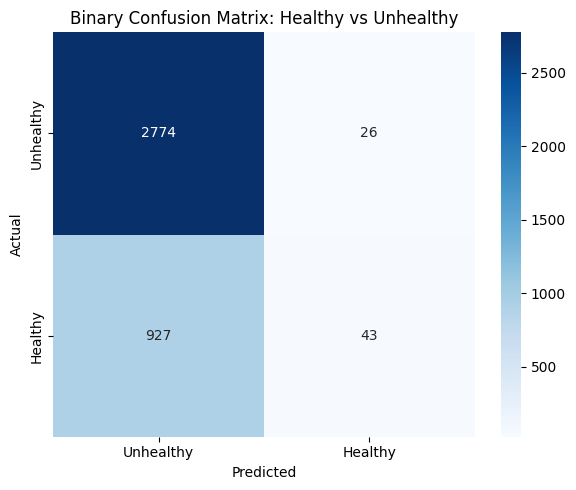

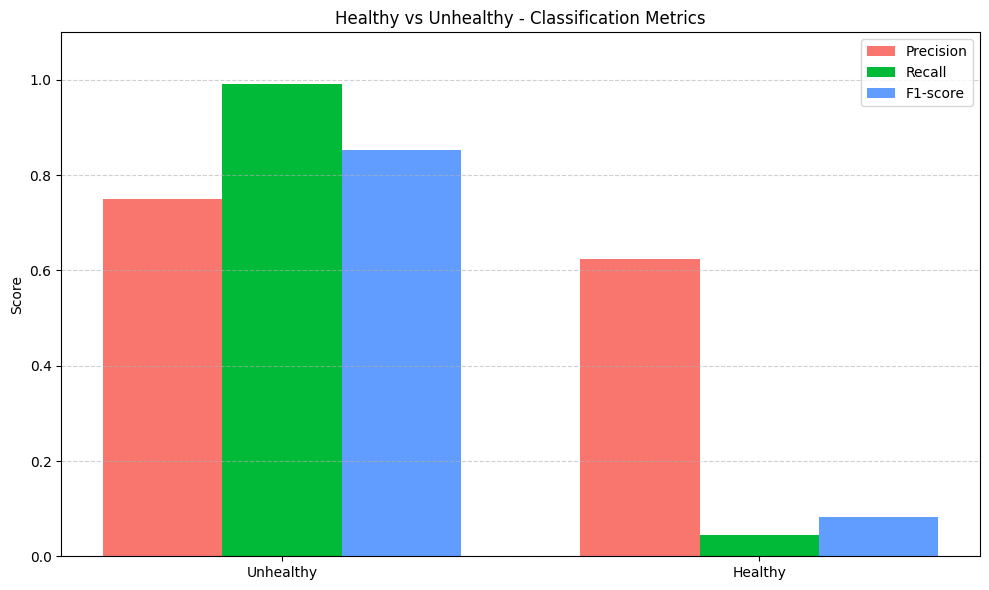

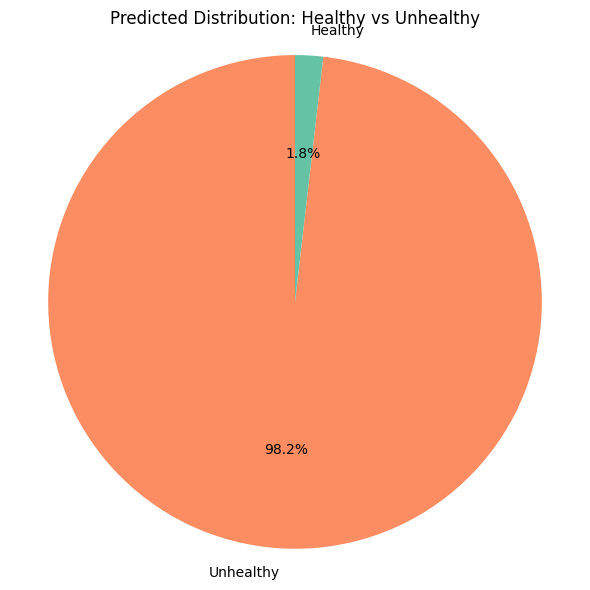

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- Define Healthy Classes (based on name) ---
healthy_classes = [cls for cls in class_names if 'healthy' in cls.lower()]
healthy_class_indices = [class_names.index(cls) for cls in healthy_classes]

# --- Convert to Binary Labels ---
y_true_binary = [1 if label in healthy_class_indices else 0 for label in Y_true.numpy()]
y_pred_binary = [1 if label in healthy_class_indices else 0 for label in predicted_categories.numpy()]

# --- Classification Report ---
print("Healthy vs Unhealthy Classification Report:\n")
print(classification_report(y_true_binary, y_pred_binary, target_names=["Unhealthy", "Healthy"]))

# --- Confusion Matrix ---
cm = confusion_matrix(y_true_binary, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Unhealthy", "Healthy"],
            yticklabels=["Unhealthy", "Healthy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Binary Confusion Matrix: Healthy vs Unhealthy")
plt.tight_layout()
plt.show()


import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Classification report for bar chart
report = classification_report(
    y_true_binary,
    y_pred_binary,
    target_names=["Unhealthy", "Healthy"],
    output_dict=True
)

# ---- BAR CHART: Precision, Recall, F1 ----
labels = ["Unhealthy", "Healthy"]
metrics_to_plot = ["precision", "recall", "f1-score"]
colors = ['#f8766d', '#00ba38', '#619cff']  # Soft red, green, blue

x = np.arange(len(labels))  # positions for 'Unhealthy', 'Healthy'
width = 0.25

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics_to_plot):
    values = [report[label][metric] for label in labels]
    plt.bar(x + i * width, values, width, label=metric.capitalize(), color=colors[i])

plt.xticks(x + width, labels)
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Healthy vs Unhealthy - Classification Metrics")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ---- PIE CHART: Healthy vs Unhealthy Predictions ----
pred_counts = [np.sum(np.array(y_pred_binary) == 0), np.sum(np.array(y_pred_binary) == 1)]

plt.figure(figsize=(6, 6))
plt.pie(
    pred_counts,
    labels=["Unhealthy", "Healthy"],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#fc8d62', '#66c2a5']
)
plt.title('Predicted Distribution: Healthy vs Unhealthy')
plt.axis('equal')
plt.tight_layout()
plt.show()



Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 196ms/step - accuracy: 0.0308 - loss: 3.6072 - val_accuracy: 0.0090 - val_loss: 3.6095
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.0414 - loss: 3.5014 - val_accuracy: 0.0544 - val_loss: 3.4788
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 172ms/step - accuracy: 0.0689 - loss: 3.3544 - val_accuracy: 0.0907 - val_loss: 3.5676
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 172ms/step - accuracy: 0.1173 - loss: 3.1766 - val_accuracy: 0.1576 - val_loss: 3.1944
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.1795 - loss: 2.9143 - val_accuracy: 0.2191 - val_loss: 2.8695
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.2121 - loss: 2.7292 - val_accuracy: 0.2735 - val_loss: 2.6235
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.2595 - loss: 2.5024 - val_accuracy: 0.2833 - val_loss: 2.4861
Epoch 8/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 166ms/step - accuracy: 0.2964 - loss: 2.3257 - val

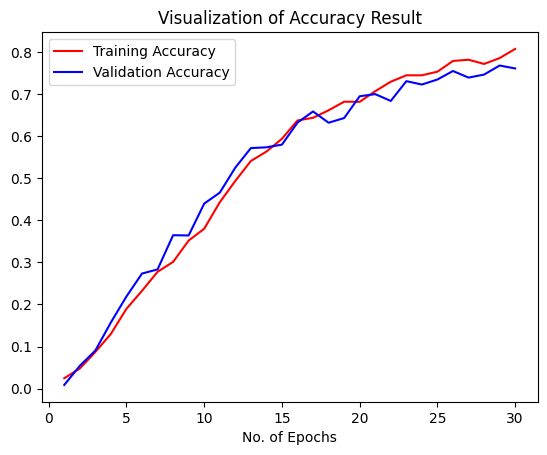

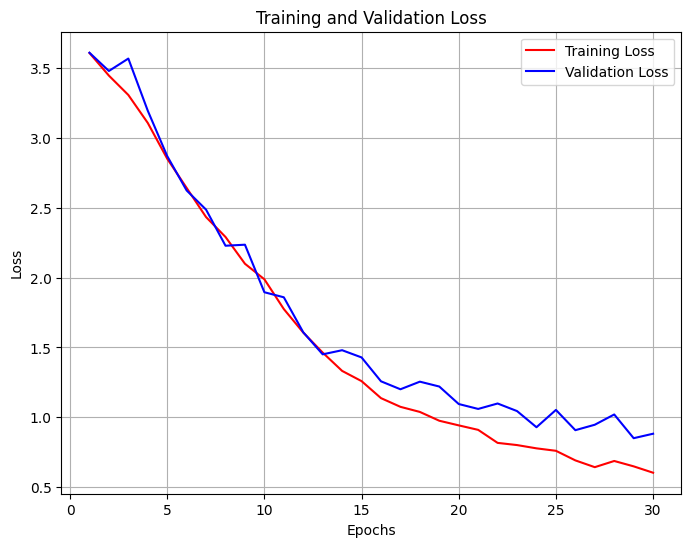

Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.37      0.09      0.14       126
                                 Apple___Black_rot       0.65      0.71      0.68       125
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        55
                                   Apple___healthy       0.00      0.00      0.00       109
                               Blueberry___healthy       0.05      0.99      0.10       100
          Cherry_(including_sour)___Powdery_mildew       1.00      0.03      0.06       100
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       102
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       103
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       109
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

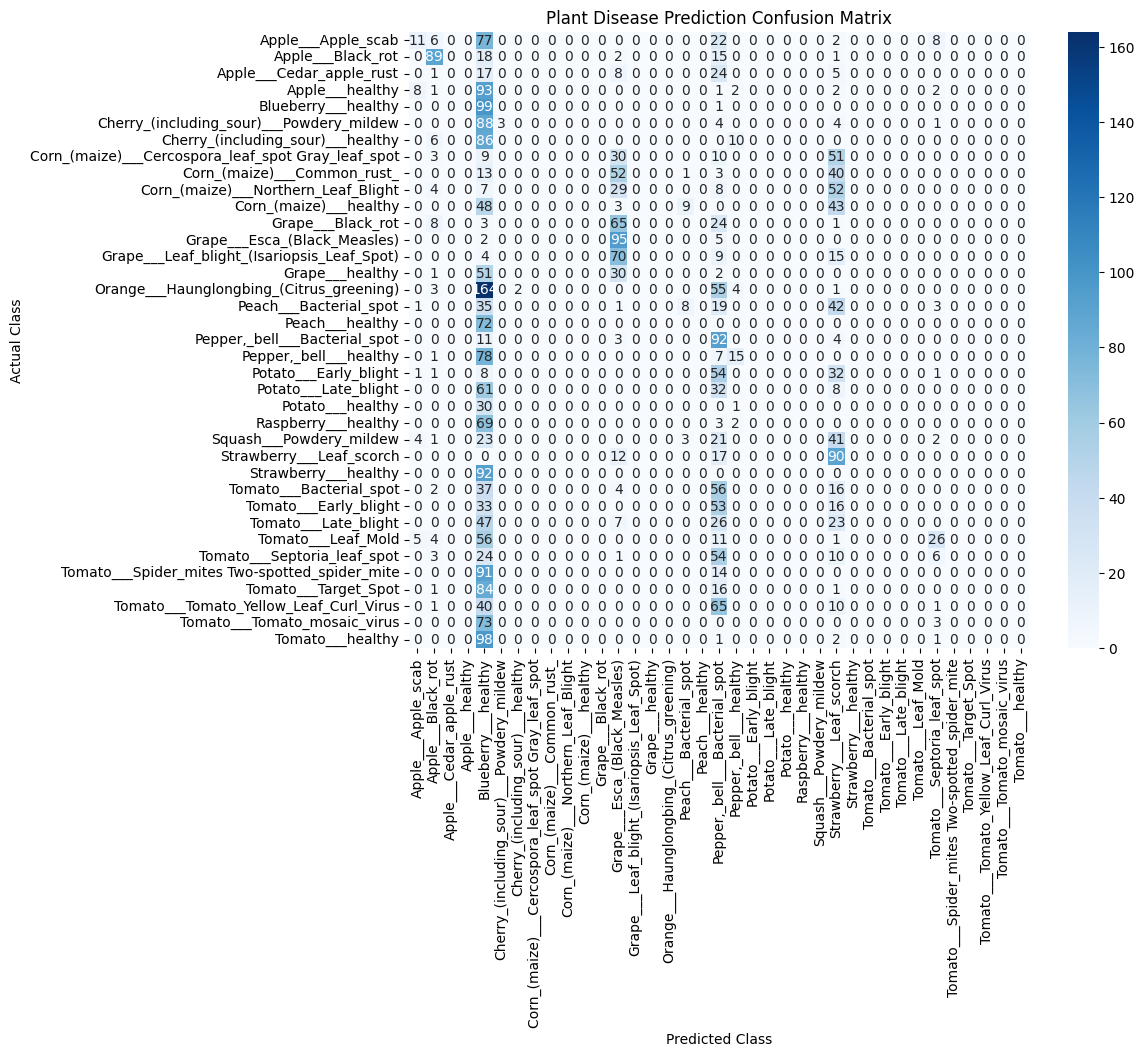

Healthy vs Unhealthy Classification Report:

              precision    recall  f1-score   support

   Unhealthy       0.93      0.63      0.75      2800
     Healthy       0.45      0.87      0.59       970

    accuracy                           0.69      3770
   macro avg       0.69      0.75      0.67      3770
weighted avg       0.81      0.69      0.71      3770



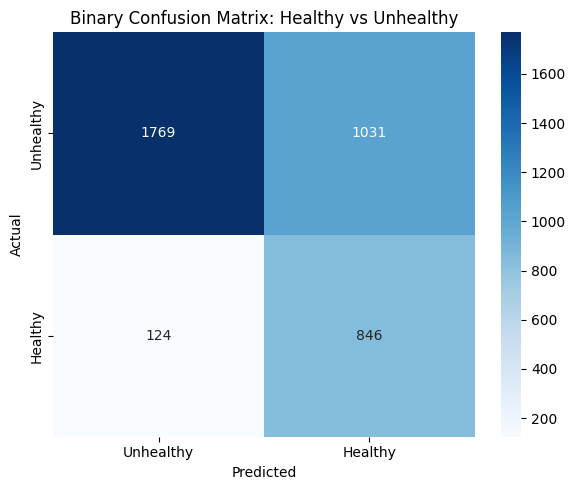

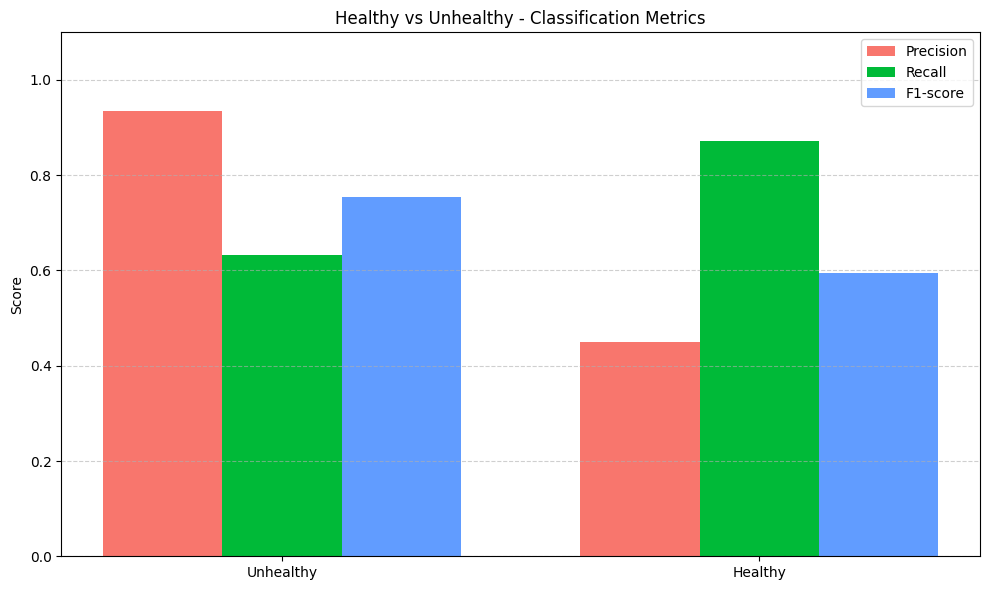

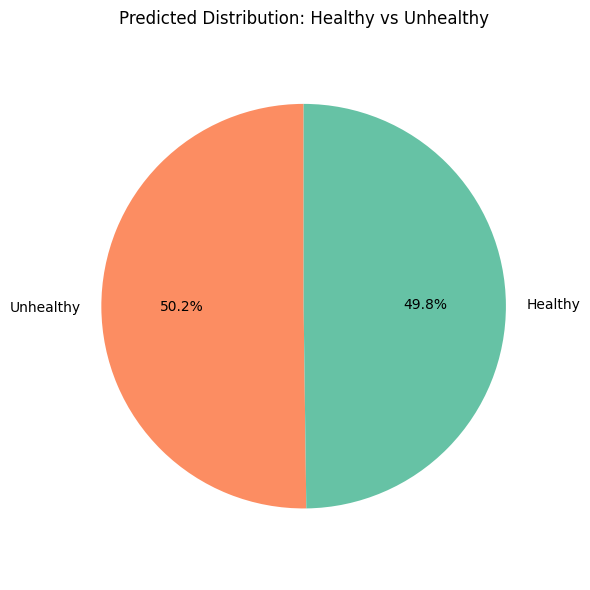

3770/3770 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step


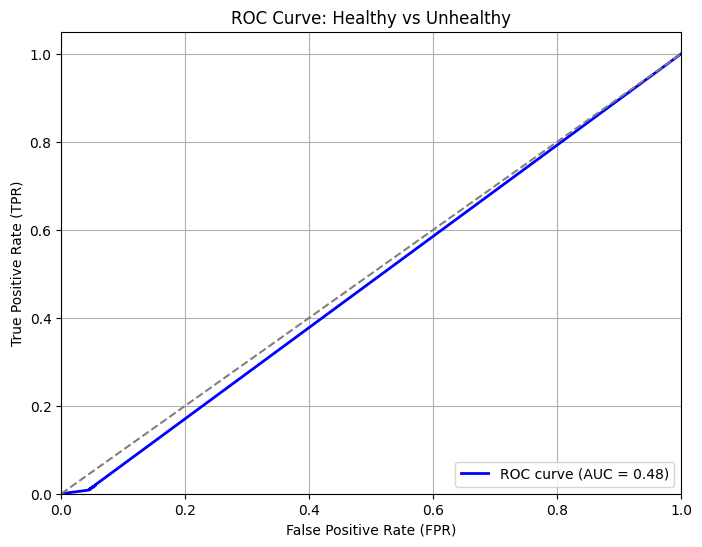

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import precision_score, recall_score, f1_score

# Data Augmentation & Normalization
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

# Store class names before applying the map function
class_names = train_dataset.class_names

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# Now you can print the class names
print("Training Set Classes:", class_names)

# Define CNN model
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=1200, activation='relu'))
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=30)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)

# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['loss'], 'red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], 'blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print(class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)


# --- Define Healthy Classes (based on name) ---
healthy_classes = [cls for cls in class_names if 'healthy' in cls.lower()]
healthy_class_indices = [class_names.index(cls) for cls in healthy_classes]

# --- Convert to Binary Labels ---
y_true_binary = [1 if label in healthy_class_indices else 0 for label in Y_true.numpy()]
y_pred_binary = [1 if label in healthy_class_indices else 0 for label in predicted_categories.numpy()]

# --- Classification Report ---
print("Healthy vs Unhealthy Classification Report:\n")
print(classification_report(y_true_binary, y_pred_binary, target_names=["Unhealthy", "Healthy"]))

# --- Confusion Matrix ---
cm = confusion_matrix(y_true_binary, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Unhealthy", "Healthy"],
            yticklabels=["Unhealthy", "Healthy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Binary Confusion Matrix: Healthy vs Unhealthy")
plt.tight_layout()
plt.show()


# Classification report for bar chart
report = classification_report(
    y_true_binary,
    y_pred_binary,
    target_names=["Unhealthy", "Healthy"],
    output_dict=True
)

# ---- BAR CHART: Precision, Recall, F1 ----
labels = ["Unhealthy", "Healthy"]
metrics_to_plot = ["precision", "recall", "f1-score"]
colors = ['#f8766d', '#00ba38', '#619cff']  # Soft red, green, blue

x = np.arange(len(labels))  # positions for 'Unhealthy', 'Healthy'
width = 0.25

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics_to_plot):
    values = [report[label][metric] for label in labels]
    plt.bar(x + i * width, values, width, label=metric.capitalize(), color=colors[i])

plt.xticks(x + width, labels)
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Healthy vs Unhealthy - Classification Metrics")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ---- PIE CHART: Healthy vs Unhealthy Predictions ----
pred_counts = [np.sum(np.array(y_pred_binary) == 0), np.sum(np.array(y_pred_binary) == 1)]

plt.figure(figsize=(6, 6))
plt.pie(
    pred_counts,
    labels=["Unhealthy", "Healthy"],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#fc8d62', '#66c2a5']
)
plt.title('Predicted Distribution: Healthy vs Unhealthy')
plt.axis('equal')
plt.tight_layout()
plt.show()

# # --- ROC Curve ---
# # Get probability predictions
# y_pred_prob = cnn.predict(test_set)

# # Extract the probability of the "Healthy" class (assumed to be class 1)
# y_pred_prob_healthy = y_pred_prob[:, 1]  # Assuming class 1 corresponds to "Healthy"

# # Compute the ROC curve
# fpr, tpr, thresholds = roc_curve(y_true_binary, y_pred_prob_healthy)
# roc_auc = auc(fpr, tpr)

# # Plot the ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (FPR)')
# plt.ylabel('True Positive Rate (TPR)')
# plt.title('ROC Curve: Healthy vs Unhealthy')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()


FINALL  

Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

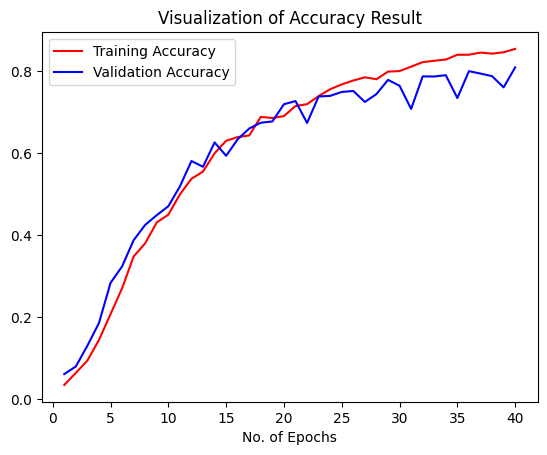

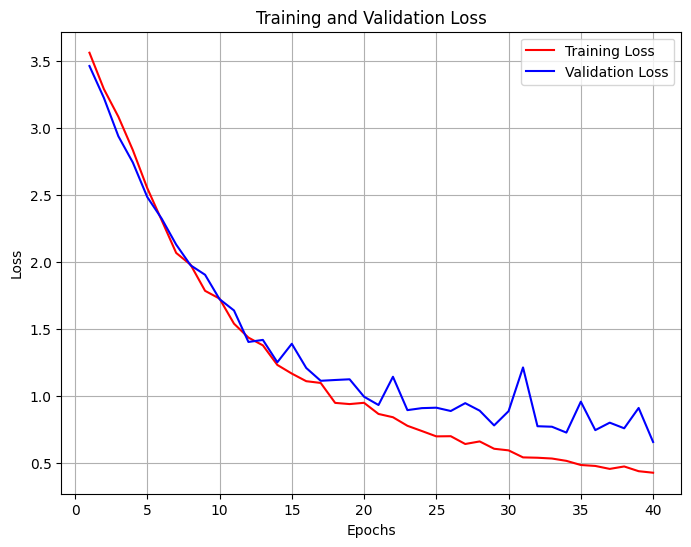

Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
    # RandomBrightness(0.2),      # Randomly adjust brightness by 20%
    # RandomContrast(0.2),        # Randomly adjust contrast by 20%


])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Store class names before applying the map function
class_names = train_dataset.class_names

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# # Print class names for both training and validation sets
# print("Training Set Classes:", train_dataset.class_names)


# Now you can print the class names
print("Training Set Classes:", class_names)

# Define CNN model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.3))
cnn.add(Flatten())
cnn.add(Dense(units=1020, activation='relu'))
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=40)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)

# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['loss'], 'red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], 'blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print(class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# # Evaluate model using a confusion matrix
# from sklearn.metrics import confusion_matrix, classification_report
# cm = confusion_matrix(Y_true, predicted_categories)
# print(classification_report(Y_true, predicted_categories, target_names=class_names))

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted Class')
# plt.ylabel('Actual Class')
# plt.title('Plant Disease Prediction Confusion Matrix')
# plt.show()


Found 3815 files belonging to 37 classes.
Found 3770 files belonging to 37 classes.
Training Set Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Sept

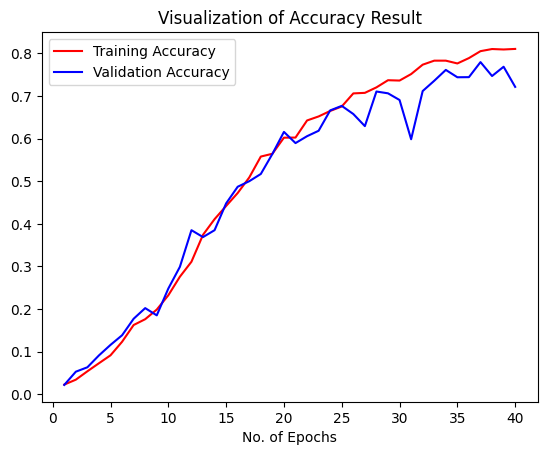

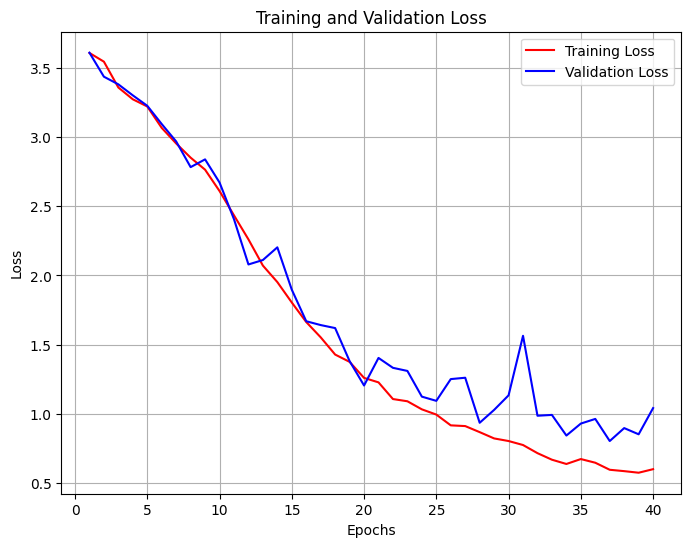

Found 3770 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite'

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Data Augmentation & Normalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),  # Flip images randomly
    RandomRotation(0.2),       # Rotate images randomly
    RandomZoom(0.2),           # Zoom randomly
    # RandomBrightness(0.2),      # Randomly adjust brightness by 20%
    # RandomContrast(0.2),        # Randomly adjust contrast by 20%


])

normalization_layer = Rescaling(1./255)  # Normalize pixels to range [0,1]

# Load training dataset from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Load validation dataset from directory
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Store class names before applying the map function
class_names = train_dataset.class_names

# Apply data augmentation & normalization to the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
valid_dataset = valid_dataset.map(lambda x, y: (normalization_layer(x), y))

# # Print class names for both training and validation sets
# print("Training Set Classes:", train_dataset.class_names)


# Now you can print the class names
print("Training Set Classes:", class_names)

# Define CNN model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

cnn.add(Dropout(0.3))
cnn.add(Flatten())
cnn.add(Dense(units=1020, activation='relu'))
cnn.add(Dropout(0.4))  # To avoid overfitting

# Output Layer
cnn.add(Dense(units=37, activation='softmax'))

# Compile the model
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
training_history = cnn.fit(train_dataset, validation_data=valid_dataset, epochs=40)

# Evaluate the model on training set
train_loss, train_acc = cnn.evaluate(train_dataset)
print('Training accuracy:', train_acc)

# Evaluate the model on validation set
val_loss, val_acc = cnn.evaluate(valid_dataset)
print('Validation accuracy:', val_acc)

# Save the trained model
cnn.save('trained_plant_disease_model.keras')

# Plot accuracy results
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_history.history['loss'], 'red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], 'blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Load test dataset
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False
)

# Get class names
class_names = test_set.class_names
print(class_names)

# Make predictions
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

# Get true labels
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

# # Evaluate model using a confusion matrix
# from sklearn.metrics import confusion_matrix, classification_report
# cm = confusion_matrix(Y_true, predicted_categories)
# print(classification_report(Y_true, predicted_categories, target_names=class_names))

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted Class')
# plt.ylabel('Actual Class')
# plt.title('Plant Disease Prediction Confusion Matrix')
# plt.show()


Healthy vs Unhealthy Classification Report:

              precision    recall  f1-score   support

   Unhealthy       0.89      0.76      0.82      2800
     Healthy       0.51      0.71      0.60       970

    accuracy                           0.75      3770
   macro avg       0.70      0.74      0.71      3770
weighted avg       0.79      0.75      0.76      3770



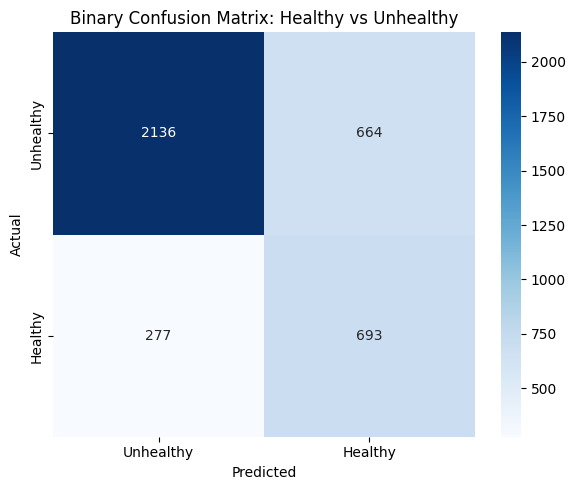

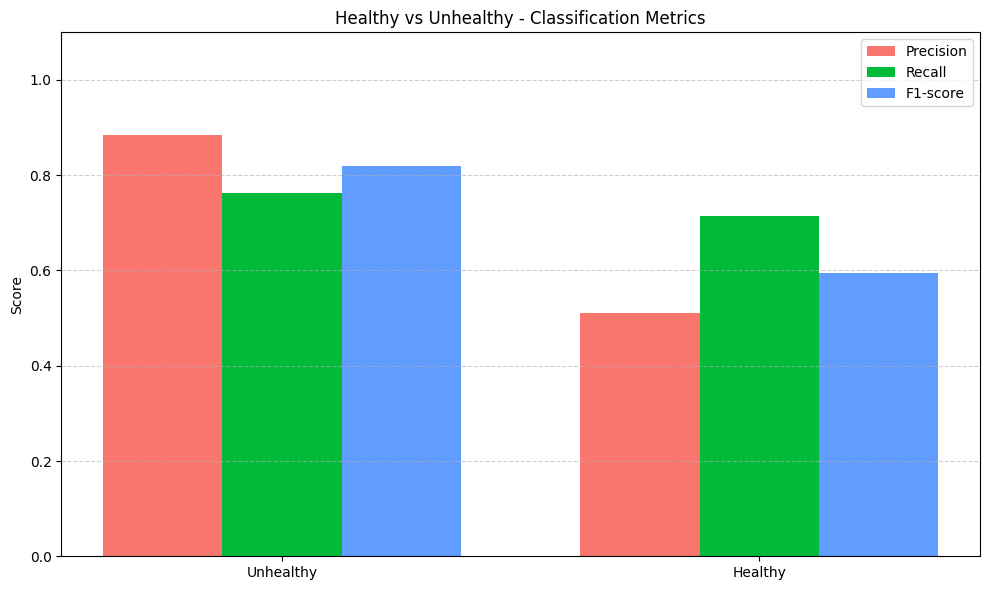

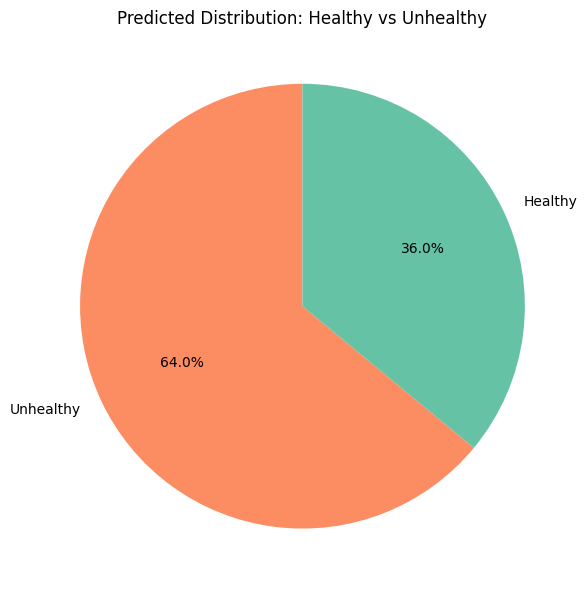

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- Define Healthy Classes (based on name) ---
healthy_classes = [cls for cls in class_names if 'healthy' in cls.lower()]
healthy_class_indices = [class_names.index(cls) for cls in healthy_classes]

# --- Convert to Binary Labels ---
y_true_binary = [1 if label in healthy_class_indices else 0 for label in Y_true.numpy()]
y_pred_binary = [1 if label in healthy_class_indices else 0 for label in predicted_categories.numpy()]

# --- Classification Report ---
print("Healthy vs Unhealthy Classification Report:\n")
print(classification_report(y_true_binary, y_pred_binary, target_names=["Unhealthy", "Healthy"]))

# --- Confusion Matrix ---
cm = confusion_matrix(y_true_binary, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Unhealthy", "Healthy"],
            yticklabels=["Unhealthy", "Healthy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Binary Confusion Matrix: Healthy vs Unhealthy")
plt.tight_layout()
plt.show()


import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Classification report for bar chart
report = classification_report(
    y_true_binary,
    y_pred_binary,
    target_names=["Unhealthy", "Healthy"],
    output_dict=True
)

# ---- BAR CHART: Precision, Recall, F1 ----
labels = ["Unhealthy", "Healthy"]
metrics_to_plot = ["precision", "recall", "f1-score"]
colors = ['#f8766d', '#00ba38', '#619cff']  # Soft red, green, blue

x = np.arange(len(labels))  # positions for 'Unhealthy', 'Healthy'
width = 0.25

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics_to_plot):
    values = [report[label][metric] for label in labels]
    plt.bar(x + i * width, values, width, label=metric.capitalize(), color=colors[i])

plt.xticks(x + width, labels)
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Healthy vs Unhealthy - Classification Metrics")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ---- PIE CHART: Healthy vs Unhealthy Predictions ----
pred_counts = [np.sum(np.array(y_pred_binary) == 0), np.sum(np.array(y_pred_binary) == 1)]

plt.figure(figsize=(6, 6))
plt.pie(
    pred_counts,
    labels=["Unhealthy", "Healthy"],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#fc8d62', '#66c2a5']
)
plt.title('Predicted Distribution: Healthy vs Unhealthy')
plt.axis('equal')
plt.tight_layout()
plt.show()

